<a href="https://colab.research.google.com/github/abigailvania99/machineLearning/blob/main/House_Price_dan_Insurance_Abigail_Vania_2402345072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning
Tugas Personal 2 - Regresi <br>
Nama: Abigail Vania <br>
NIM : 2402345072<br>


**Regresi** <br>
Salah satu teknik statistik yang dikenal sebagai regresi digunakan untuk memodelkan dan menganalisis hubungan antara satu atau lebih variabel independen (biasanya disebut sebagai "X" atau "prediktor") dan satu variabel dependen (biasanya disebut sebagai "Y" atau "variabel target"). Tujuan utama regresi adalah untuk mengetahui dan mengukur hubungan linier atau non-linier antara variabel-variabel ini, serta untuk menggunakan model ini untuk memprediksi nilai.

<br>
Ada beberapa model regresi:<br>
1. Linear Regression<br>
2. Polynomial Regression<br>
3. Random Forest Regressor<br>
4. Ridge Regression<br>
5. Lasso Regression<br>
6. ElasticNet<br>
7. Decision Tree Regressor<br>



Evaluasi model dapat dilakukan beberapa cara
<br>
1. Mean Absolute Error (MAE):<br>
MAE adalah ukuran rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Tingkat MAE yang lebih rendah menunjukkan seberapa baik model tersebut melakukan kesalahan prediksi.

2. Mean Squared Error (MSE):<br>
Rata-rata kuadrat dari selisih antara nilai prediksi dan nilai sebenarnya disebut MSE. Nilai MSE yang lebih kecil menunjukkan kinerja yang lebih baik.

3. Root Mean Squared Error (RMSE):<br>
RMSE adalah akar kuadrat dari MSE dan digunakan untuk mengukur tingkat kesalahan model. Karena unitnya sama dengan unit variabel dependen, RMSE memberikan nilai yang lebih intuitif, dan nilai yang lebih kecil menunjukkan kinerja yang lebih baik.

4. R-squared<br>
Nilai R-squared, yang berkisar antara 0 dan 1, menunjukkan seberapa baik model Anda menjelaskan variabilitas dalam variabel dependen dibandingkan dengan model yang hanya memprediksi nilai rata-rata dari variabel dependen. Nilai yang lebih tinggi menunjukkan bahwa model Anda lebih baik dalam memfitting data.


##House Price Regression

###1. Import Library

Melakukan import library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

###2. Membaca data csv

Data csv house price ini dibaca dari csv yang sudah diupload digithub dengan pemisah semicolon (;)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abigailvania99/machineLearning/main/house_price_id%20(1).csv", delimiter=';')

<li> Menampilkan sampel 5 data teratas

In [ ]:
df.head()

id    price  bedrooms bathrooms  sqft_living  sqft_lot floors  waterfront  \
0   1   315000         3       1,5         1340      7912    1,5           0   
1   2  1394000         5       2,5         3650      9050      2           0   
2   3   520000         3         2         1930     11947      1           0   
3   4   485000         3       2,3         2000      8030      1           0   
4   5   478000         4       2,5         1940     10500      1           0   

   view  condition  sqft_above  sqft_basement  
0     0          3        1340              0  
1     4          5        3370            280  
2     0          4        1930              0  
3     0          4        1000           1000  
4     0          4        1140            800

###3. Menghapus kolom ID

Kolom ID dihapus karena tidak digunakan dalam melakukan analisa

In [ ]:
df = df.drop("id", axis=1)

###4. Memeriksa data null

Kemudian, melakukan pengecekan dari dataset, apakah ada data yang null

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
dtype: int64

Ternyata tidak ada data yang null atau kosong

###5. Mengetahui tipe data pada masing-masing atribut

Hal ini dilakukan untuk mempermudah melakukan visualisasi dan regresi

In [ ]:
df.dtypes

price             int64
bedrooms          int64
bathrooms        object
sqft_living       int64
sqft_lot          int64
floors           object
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
dtype: object

###6. Meringkas Data

Langkah ini dilakukan untuk mempermudah untuk melihat rata-rata, standar deviasi, minimal, maksimum value dan lain-lain

In [ ]:
df.describe()

price     bedrooms   sqft_living      sqft_lot   waterfront  \
count  4.600000e+03  4600.000000   4600.000000  4.600000e+03  4600.000000   
mean   5.692520e+05     3.400870   2139.346957  1.485252e+04     0.007174   
std    2.842518e+05     0.908848    963.206916  3.588444e+04     0.084404   
min    1.630000e+05     0.000000    370.000000  6.380000e+02     0.000000   
25%    3.960000e+05     3.000000   1460.000000  5.000750e+03     0.000000   
50%    4.910000e+05     3.000000   1980.000000  7.683000e+03     0.000000   
75%    6.440000e+05     4.000000   2620.000000  1.100125e+04     0.000000   
max    4.432000e+06     9.000000  13540.000000  1.074218e+06     1.000000   

              view    condition   sqft_above  sqft_basement  
count  4600.000000  4600.000000  4600.000000    4600.000000  
mean      0.240652     3.451739  1827.265435     312.081522  
std       0.778405     0.677230   862.168977     464.137228  
min       0.000000     1.000000   370.000000       0.000000  
25%       0.000000     3.000000  1190.000000       0.000000  
50%       0.000000     3.000000  1590.000000       0.000000  
75%       0.000000     4.000000  2300.000000     610.000000  
max       4.000000     5.000000  9410.000000    4820.000000

###7. Memvisualisasikan hubungan

Langkah ini dilakukan melihat hubungan antar atribut yang memiliki tipe data int

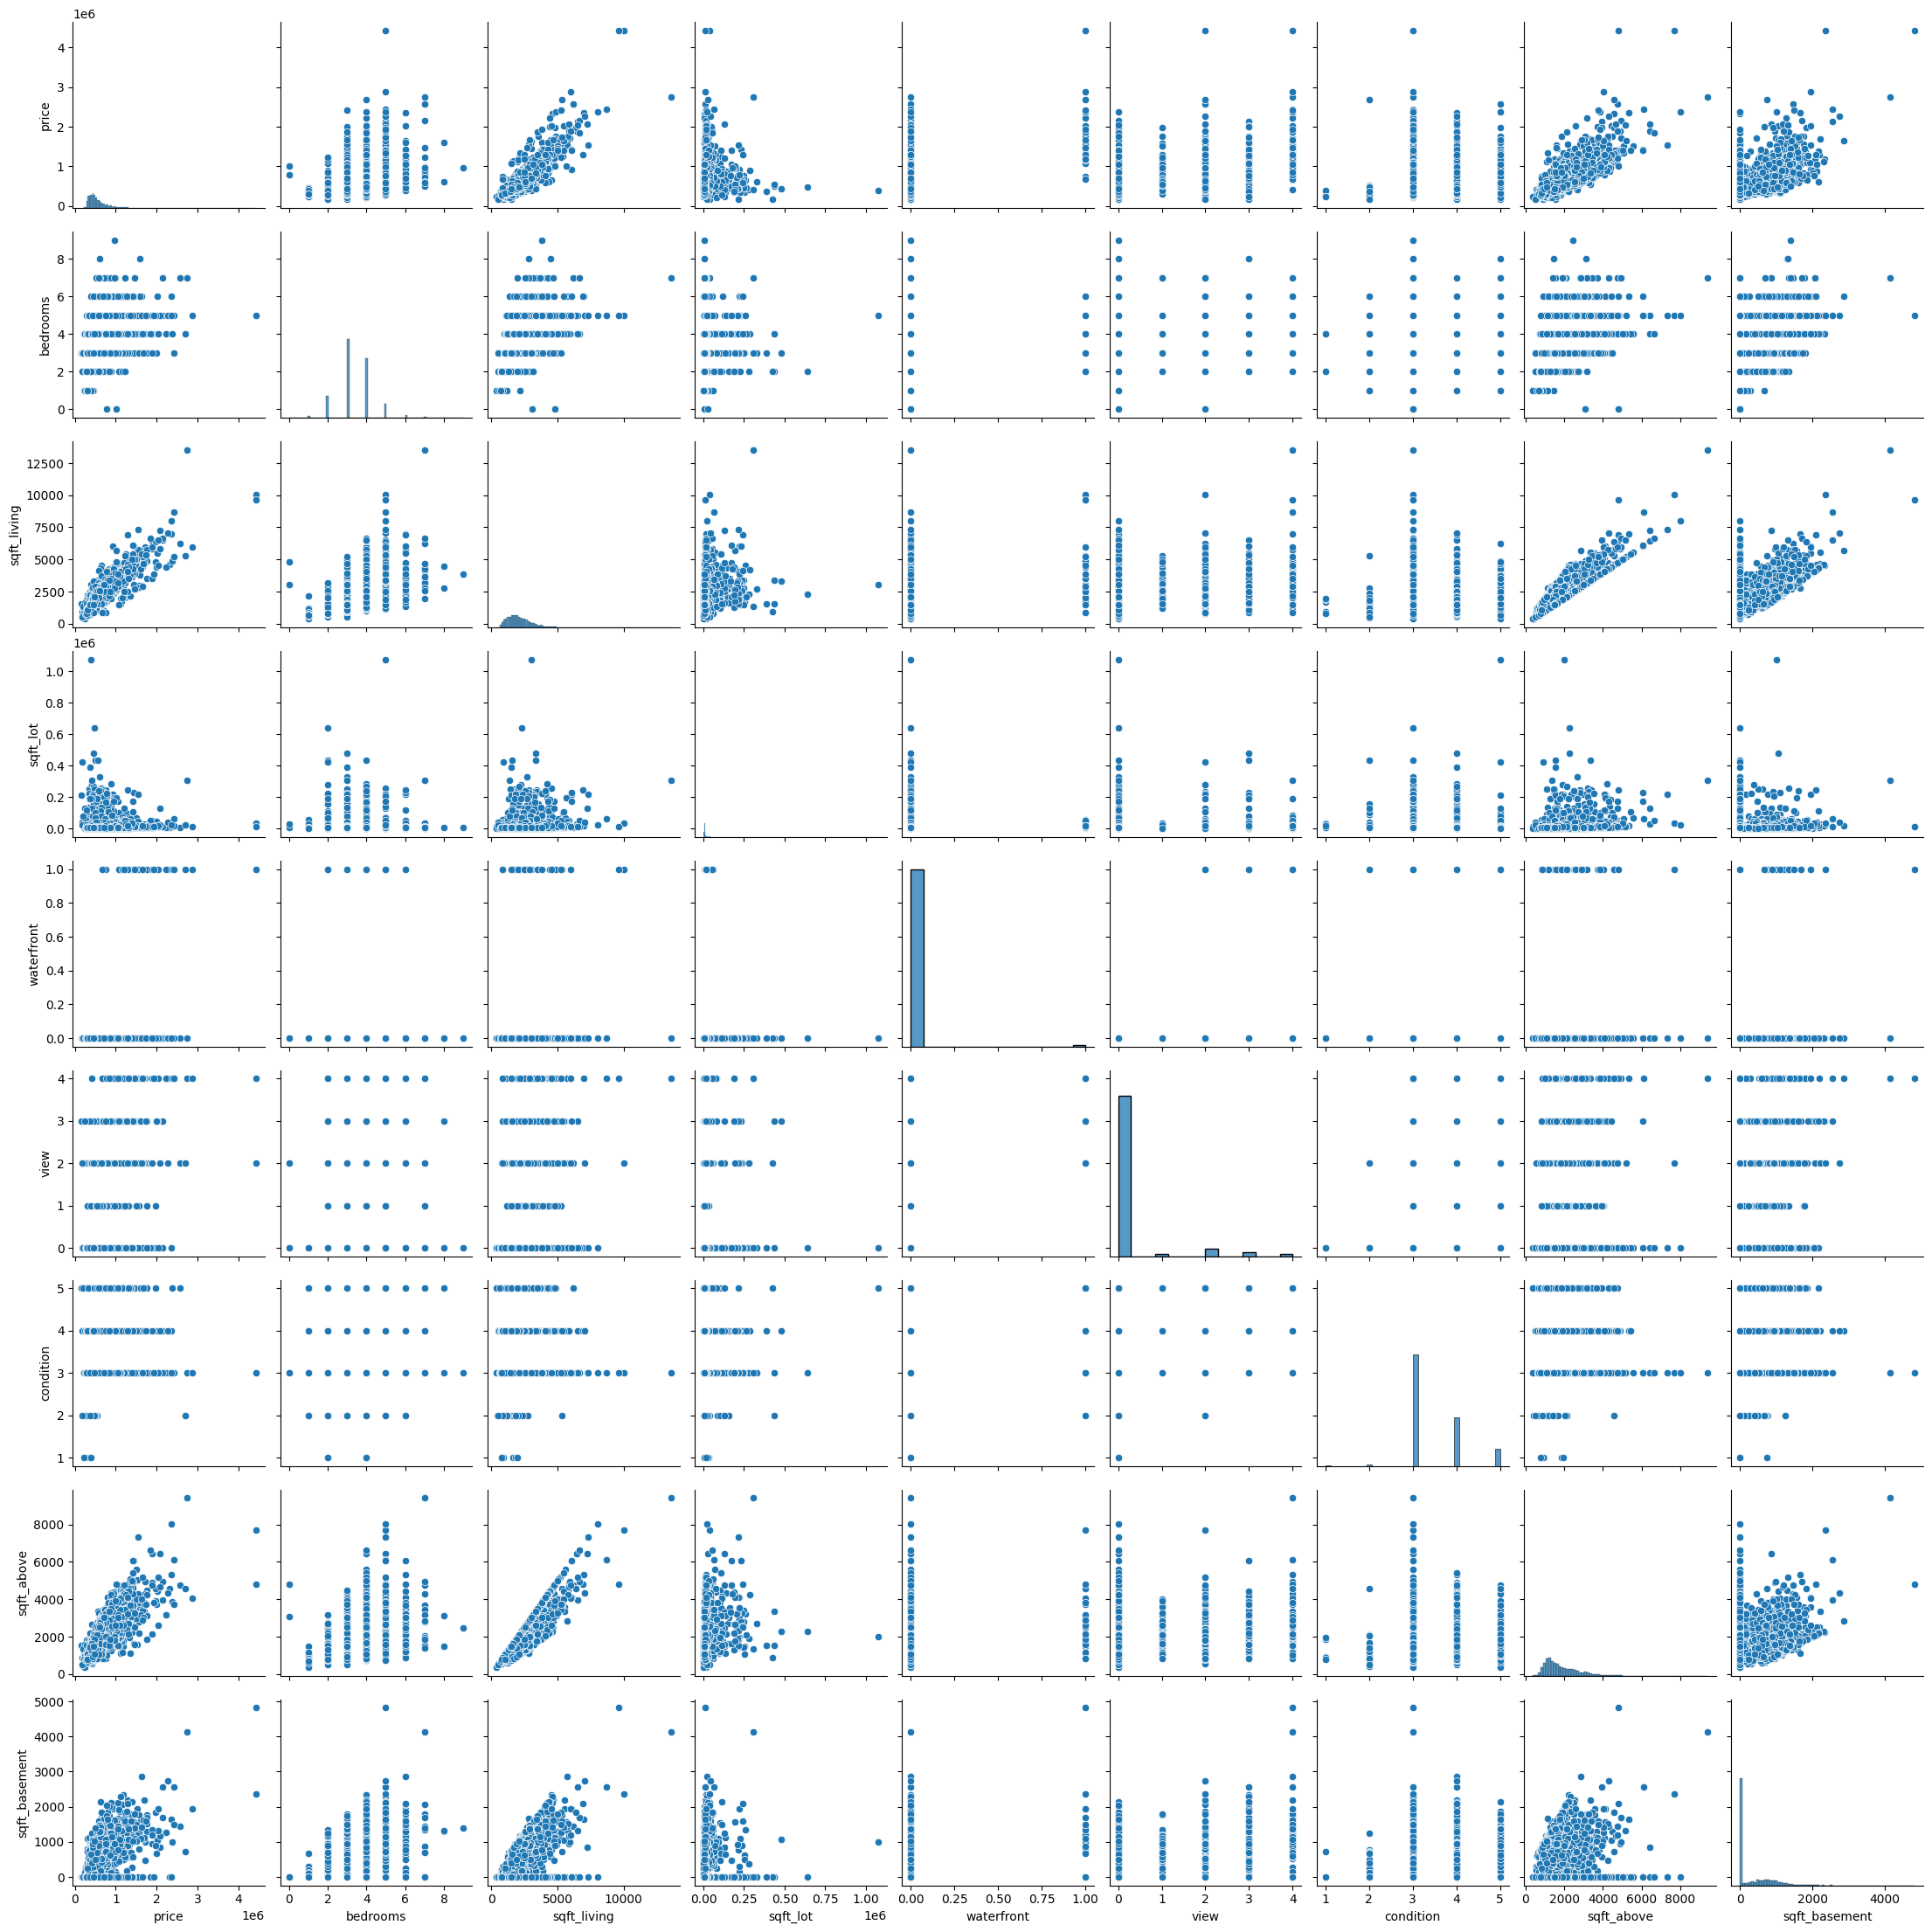

In [ ]:
sns.pairplot(df)

###8. Membuat visualisasai hubungan antar atribut dengan atribut price

<li> Visualisasi atribut yang bertipe data int <br>
Visualisasai antar atribut yang bertipe data int dengan price dilakukan dengan menggunakan scatter plot

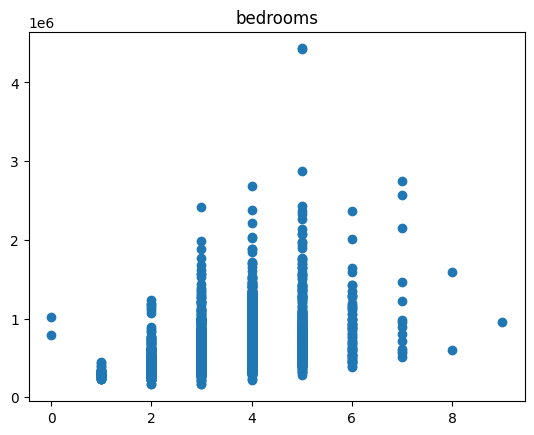

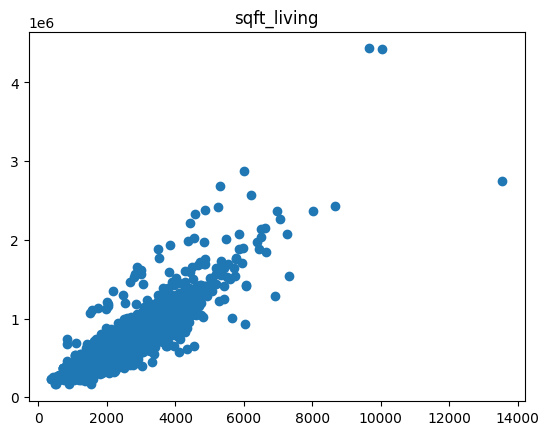

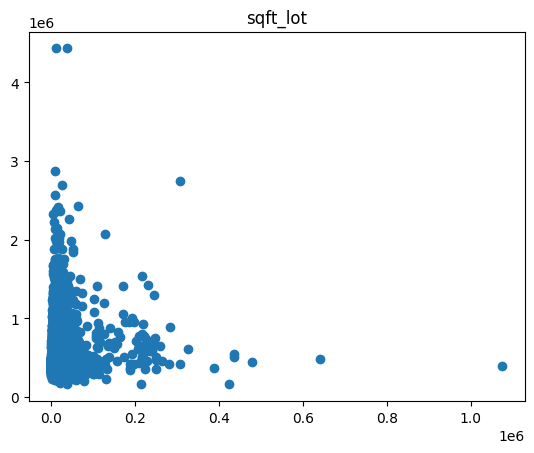

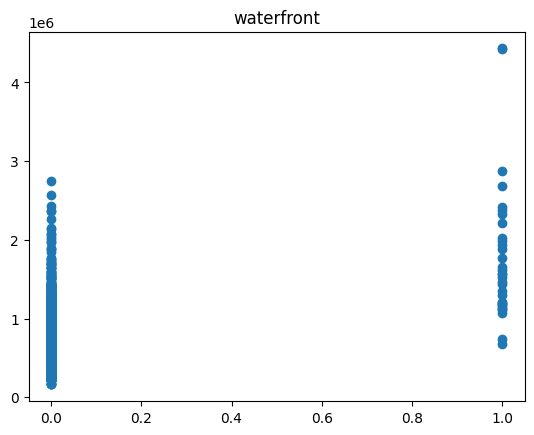

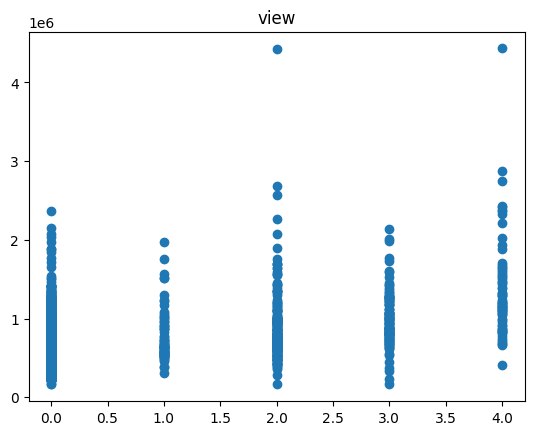

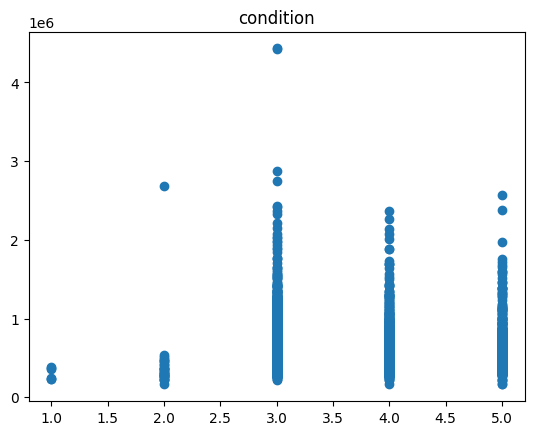

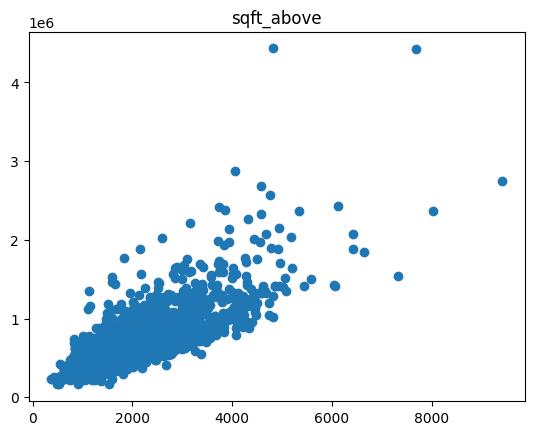

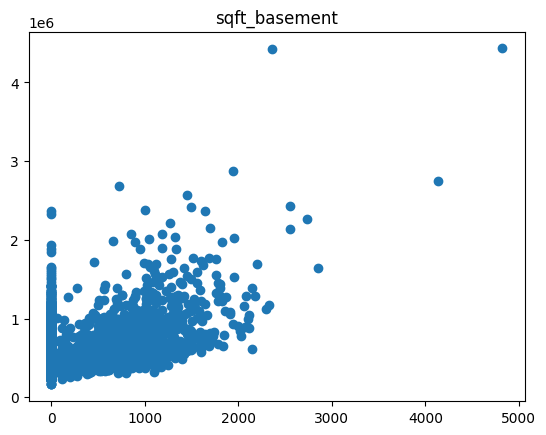

In [ ]:
intdf = df.select_dtypes(exclude = ['object'])
for i in intdf:
    if i != 'price':
      plt.scatter(df[i],df['price'])
      plt.title(i)
      plt.show()

<li> Visualisasi atribut dengen menggunakan boxplot <br>
Visualisasai menggunakan boxplot dilakukan untuk melihat apakah ada data outlier

In [ ]:
objdf = df.select_dtypes(exclude = ['int',float])
print(objdf.columns)

Index(['bathrooms', 'floors'], dtype='object')


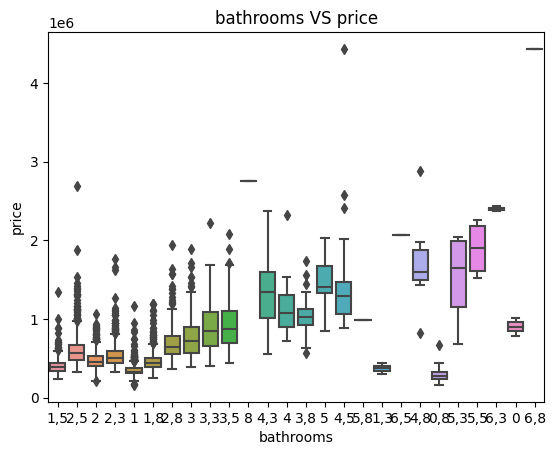

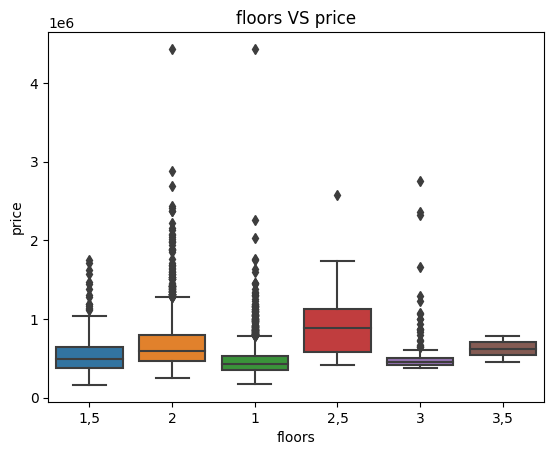

In [ ]:
for i in objdf:
  sns.boxplot(x = df[i], y = df["price"])
  plt.title(f"{i} VS price")
  plt.show()

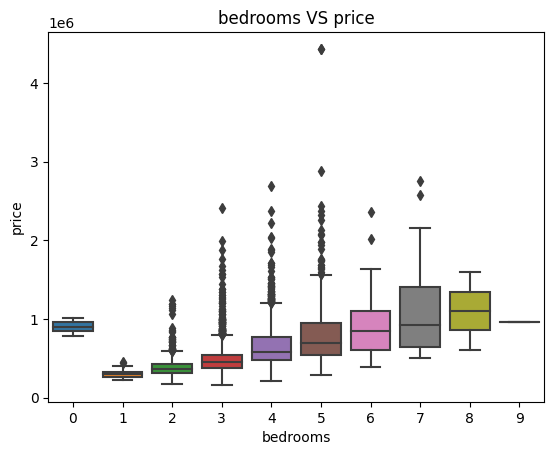

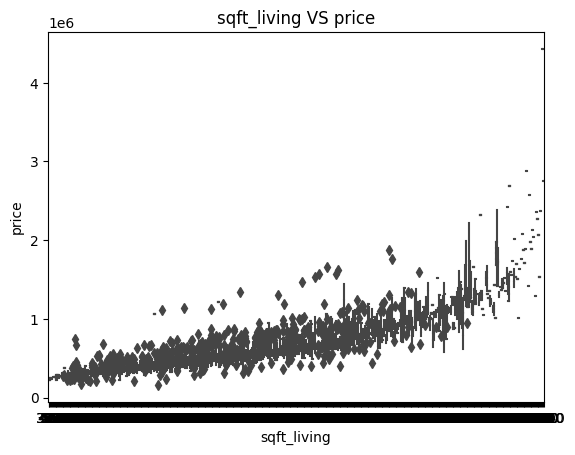

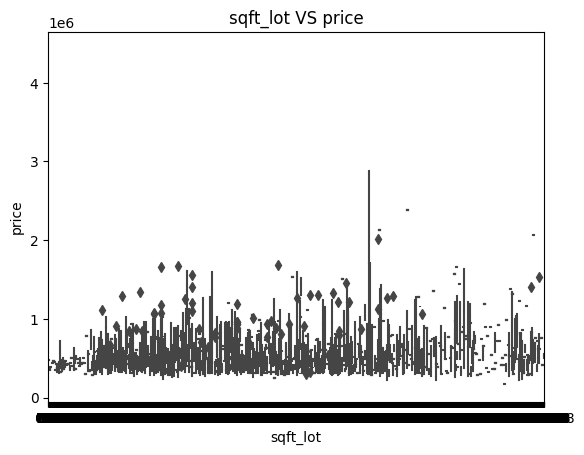

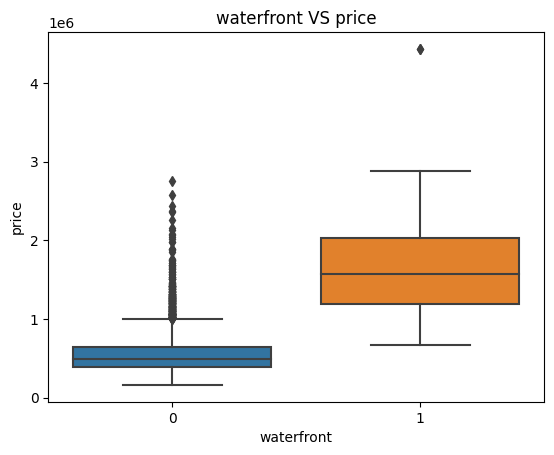

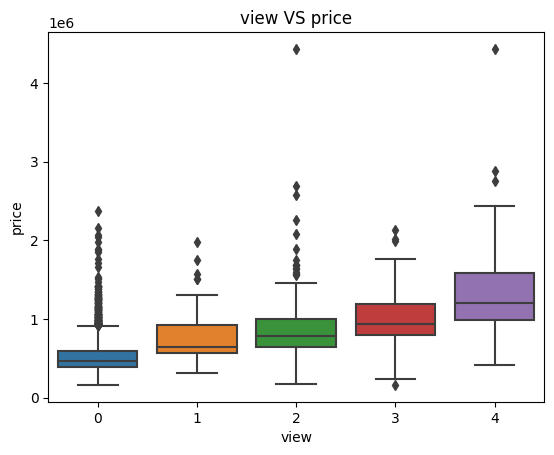

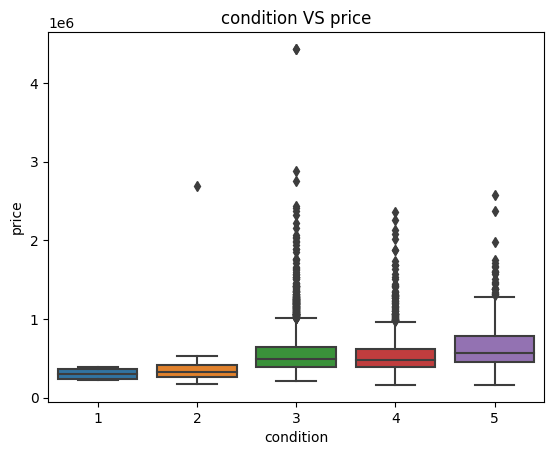

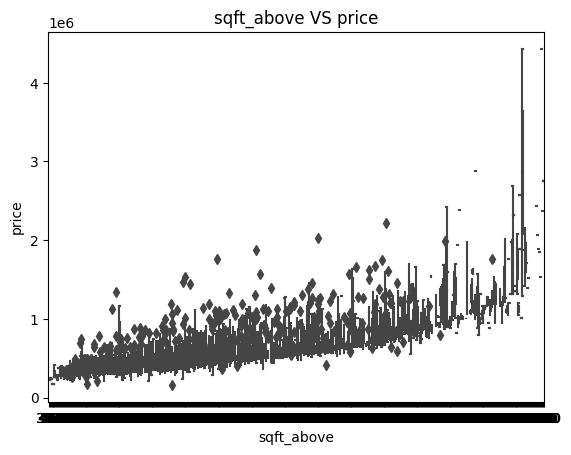

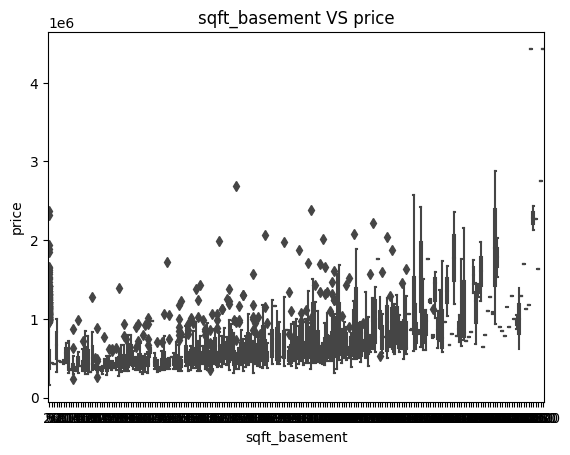

In [ ]:
for i in intdf:
  if i !='price':
    sns.boxplot(x = df[i], y = df["price"])
    plt.title(f"{i} VS price")
    plt.show()

###9. Mengubah tipe data
Atribut floor dan bathrooms diubah dari object menjadi tipe data float. Namun sebelum mengubah tipe data, mengubah ',' menjadi '.'

In [ ]:
df['floors'] = df['floors'].str.replace(',','.').astype(float)
df['bathrooms'] = df['bathrooms'].str.replace(',','.').astype(float)

###10. Korelasi antar atribut dengan price<br>


In [ ]:
df.corr()['price'].sort_values()

condition        0.064371
sqft_lot         0.089026
floors           0.316431
waterfront       0.361511
sqft_basement    0.420956
bedrooms         0.462571
view             0.512028
bathrooms        0.696031
sqft_above       0.772960
sqft_living      0.894723
price            1.000000
Name: price, dtype: float64

Berdasarkan hasil di atas dapat dikatakan bahwa atribut yang paling erat korelasi dengan price adalah sqft_living dan yang paling rendah adalah condition




###11. Memisahkan antara atribut dengan target<br>
x merupakan atribut selain price dan y merupakan target (price)

In [ ]:
x = df.drop("price", axis=1)
y = df["price"]

###12. Memisahkan data test dan data train<br>
Data testing sebesar 30% dan data trainning sebesar 70% dan dengan menggunakan random state 42


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

###13. Melakukan standarisasi data<br>
Standarisasi yang dilakukan menggunakan z-score

In [ ]:
zscaler = StandardScaler()

X_train_standard = zscaler.fit_transform(X_train)
X_test_standard = zscaler.transform(X_test)


###14. Melakukan Regresi<br>
Regresi yang dilakukan adalah Linear Regression, Polynomial Regression, Random Forest Regressor, Ridge Regression, Lasso Regression, ElasticNet, Decision Tree Regressor. <br>

Cara melakukan evaluasi model adalah R2 score, MSE, MAE, RMSE



#### Linear Regression<br>
Regresi linear adalah metode statistik yang digunakan untuk memodelkan hubungan antara dua atau lebih variabel, di mana satu atau lebih variabel independen digunakan untuk memprediksi variabel dependen.

In [ ]:
lr = LinearRegression().fit(X_train_standard,y_train)

y_train_pred = lr.predict(X_train_standard)
y_test_pred = lr.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score linear regression data train:")
print(r2_score(y_train, y_train_pred))
print("\nMSE linear regression data train:")
print(mean_squared_error(y_train, y_train_pred))
print("\nMAE linear regression data train:")
print(mean_absolute_error(y_train, y_train_pred))
print("\nRMSE linear regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))


print("\n\nEvaluasi Data Test")
print("R2 score linear regression data test:")
print(r2_score(y_test, y_test_pred))
print("\nMSE linear regression data test:")
print(mean_squared_error(y_test, y_test_pred))
print("\nMAE linear regression data test:")
print(mean_absolute_error(y_test, y_test_pred))
print("\nRMSE linear regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

Evaluasi Data Train
R2 score linear regression data train:
0.9270846525990304

MSE linear regression data train:
6017790205.368021

MAE linear regression data train:
51476.53998638799

RMSE linear regression data train:
77574.41720933533


Evaluasi Data Test
R2 score linear regression data test:
0.9224231963926512

MSE linear regression data test:
5949839891.927035

MAE linear regression data test:
51039.1102178576

RMSE linear regression data test:
77135.20526923511


Text(0.5, 0, 'y_test')

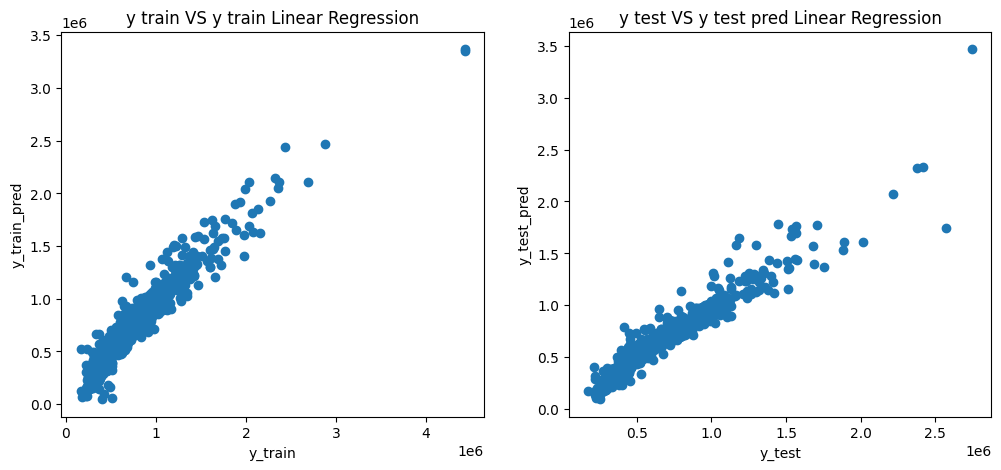

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.title("y train VS y train Linear Regression")
plt.ylabel("y_train_pred")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.title("y test VS y test pred Linear Regression")
plt.ylabel("y_test_pred")
plt.xlabel("y_test")

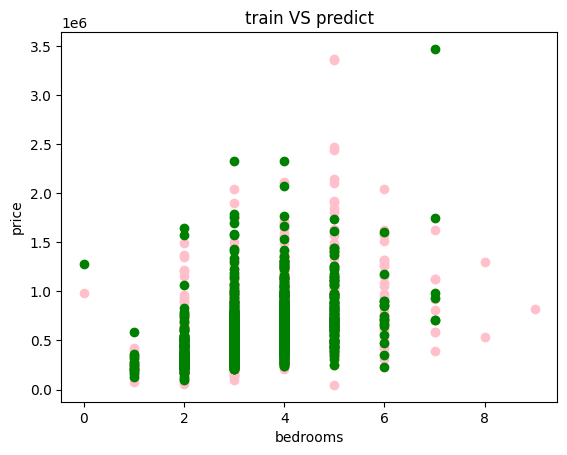

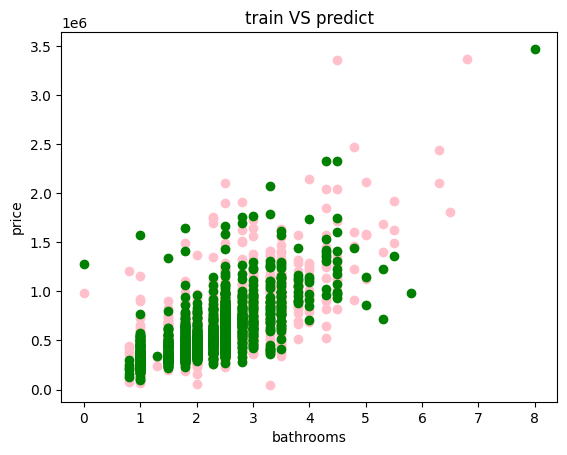

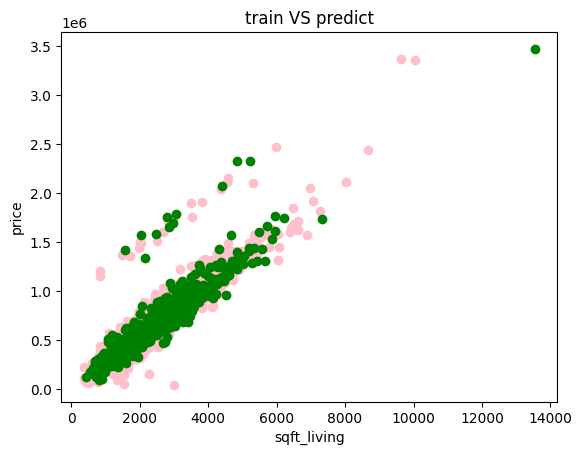

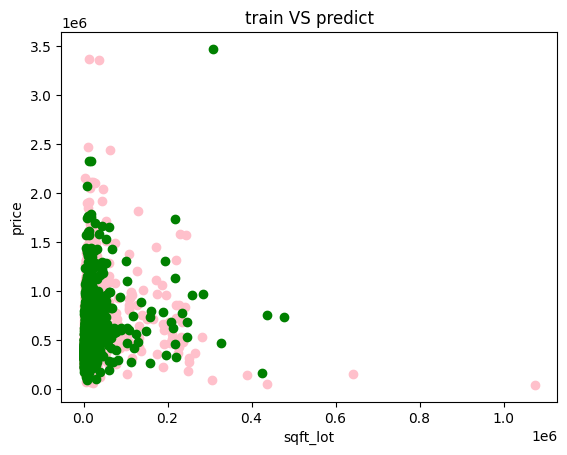

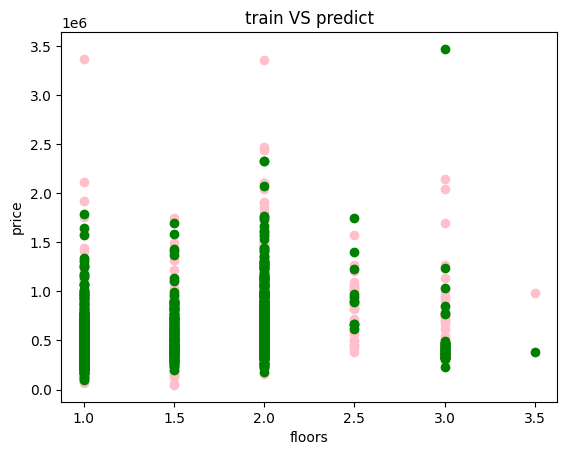

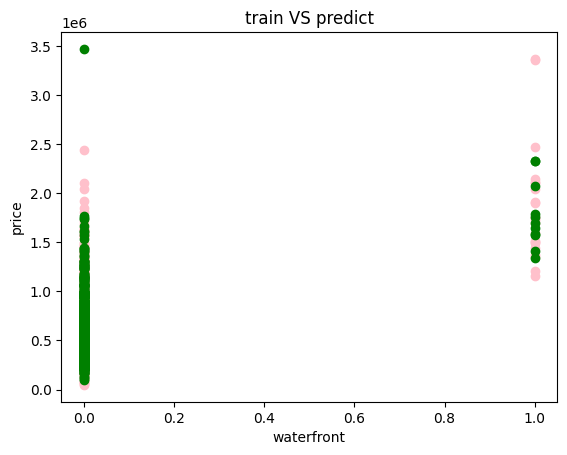

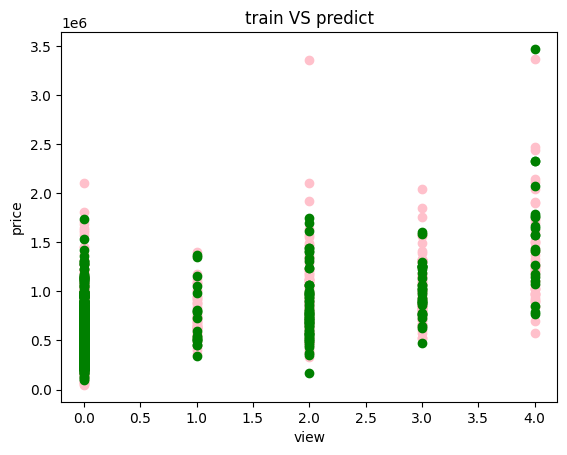

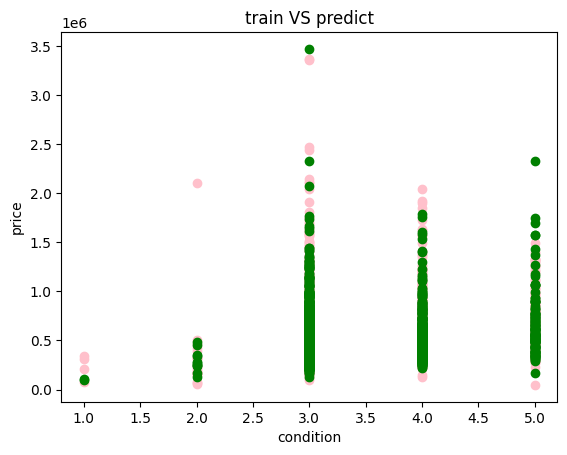

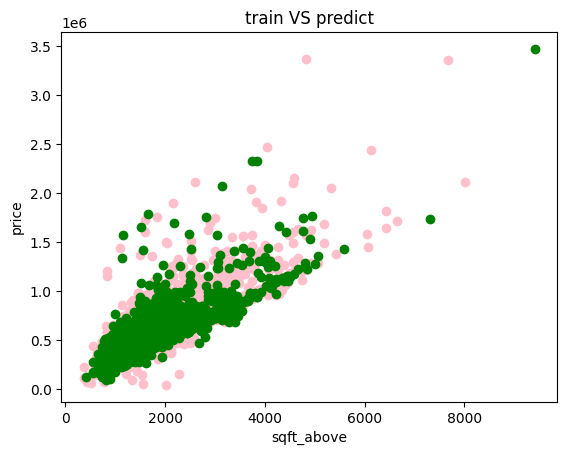

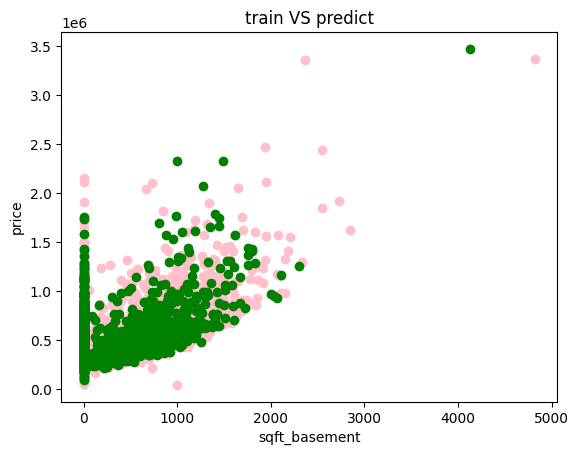

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred, color="pink")
    plt.scatter(X_test[i], y_test_pred, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Dari hasil evaluasi model dapat dikatakan bahwa model ini tidak overfit karena R-squared data train dan data test tidak terlalu berbeda jauh

####Polynomial Regression<br>
Regresi polinomial adalah variasi dari regresi linear yang digunakan ketika hubungan antara variabel independen (X) dan variabel dependen (Y) tidak dapat dimodelkan secara linear. Polynomial yang digunakan berderajat 2

In [ ]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(x_quad, y, test_size=0.3, random_state=42)



In [ ]:
zscaler = StandardScaler()

X_train_standard_poly = zscaler.fit_transform(X_train_poly)
X_test_standard_poly = zscaler.transform(X_test_poly)

plr = LinearRegression().fit(X_train_standard_poly,y_train_poly)

y_train_pred_poly = plr.predict(X_train_standard_poly)
y_test_pred_poly = plr.predict(X_test_standard_poly)


print("Evaluasi Data Train")
print("R2 score polynomial regression data train:")
print(r2_score(y_train_poly, y_train_pred_poly))
print("\nMSE polynomial regression data train:")
print(mean_squared_error(y_train_poly, y_train_pred_poly))
print("\nMAE polynomial regression data train:")
print(mean_absolute_error(y_train_poly, y_train_pred_poly))
print("\nRMSE polynomial regression data train:")
print(np.sqrt(mean_squared_error(y_train_poly, y_train_pred_poly)))


print("\n\nEvaluasi Data Test")
print("R2 score polynomial regression data test:")
print(r2_score(y_test_poly, y_test_pred_poly))
print("\nMSE polynomial regression data test:")
print(mean_squared_error(y_test_poly, y_test_pred_poly))
print("\nMAE polynomial regression data test:")
print(mean_absolute_error(y_test_poly, y_test_pred_poly))
print("\nRMSE polynomial regression data test:")
print(np.sqrt(mean_squared_error(y_test_poly, y_test_pred_poly)))


Evaluasi Data Train
R2 score polynomial regression data train:
0.9853115317850735

MSE polynomial regression data train:
1212256723.808309

MAE polynomial regression data train:
23380.37745355527

RMSE polynomial regression data train:
34817.47727518909


Evaluasi Data Test
R2 score polynomial regression data test:
0.9706141667535529

MSE polynomial regression data test:
2253779413.137149

MAE polynomial regression data test:
25951.232953406332

RMSE polynomial regression data test:
47473.986699424655


Text(0.5, 0, 'y_test')

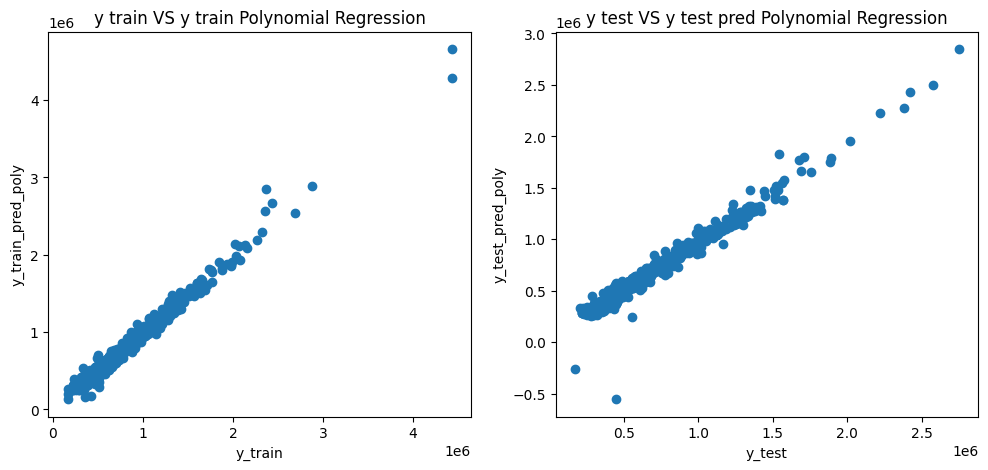

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_poly)
plt.title("y train VS y train Polynomial Regression")
plt.ylabel("y_train_pred_poly")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_poly)
plt.title("y test VS y test pred Polynomial Regression")
plt.ylabel("y_test_pred_poly")
plt.xlabel("y_test")

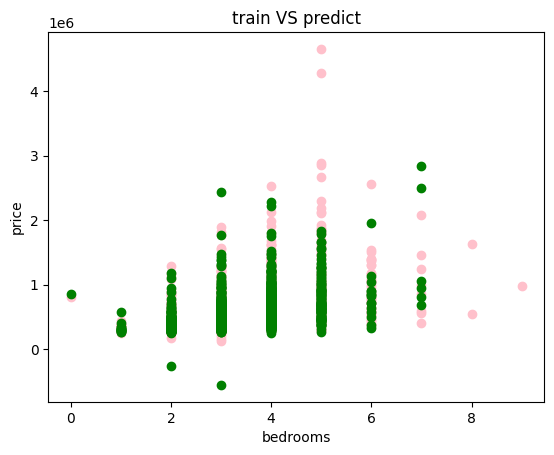

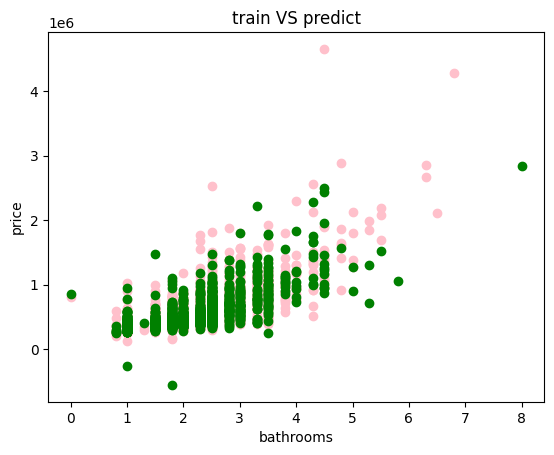

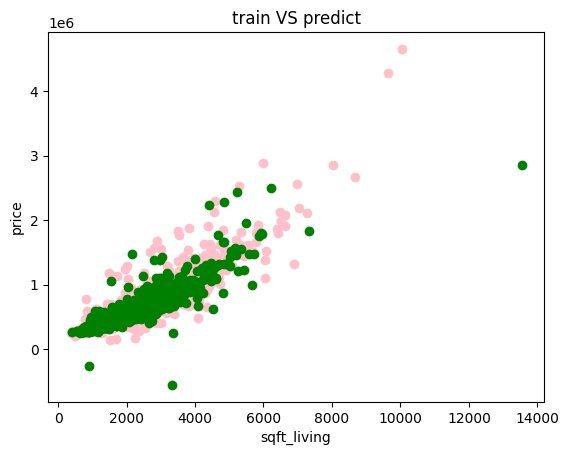

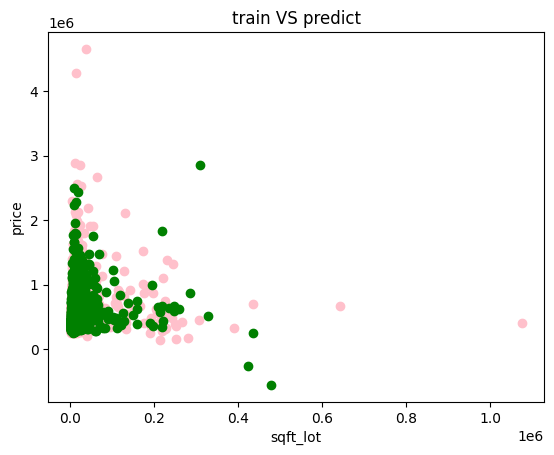

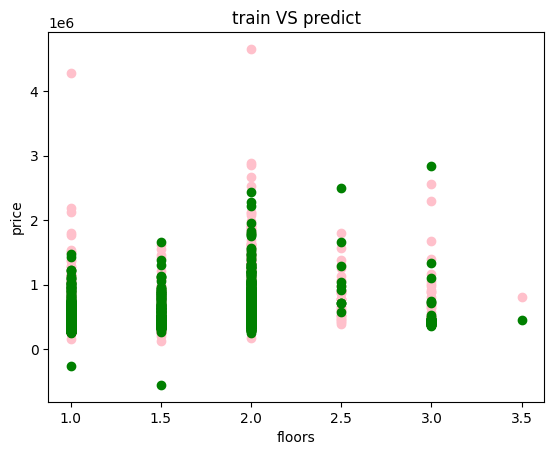

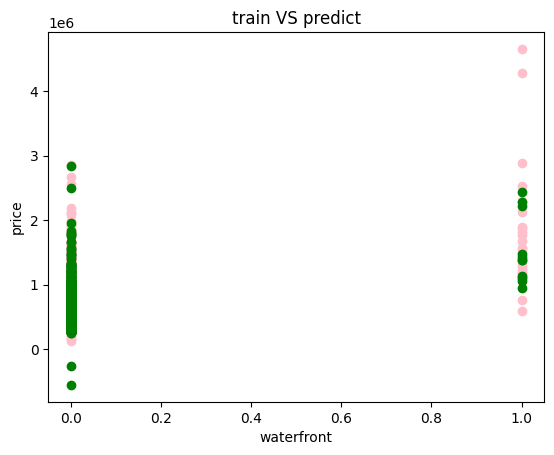

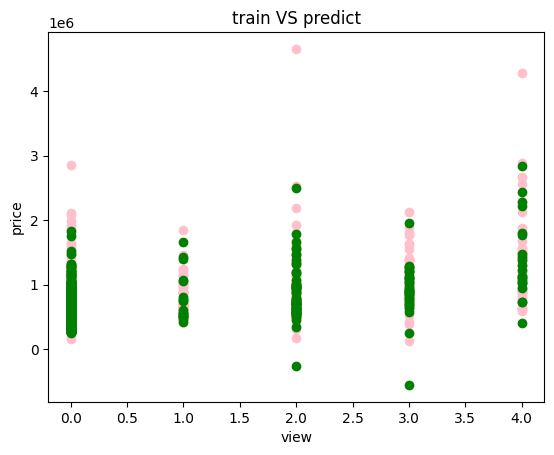

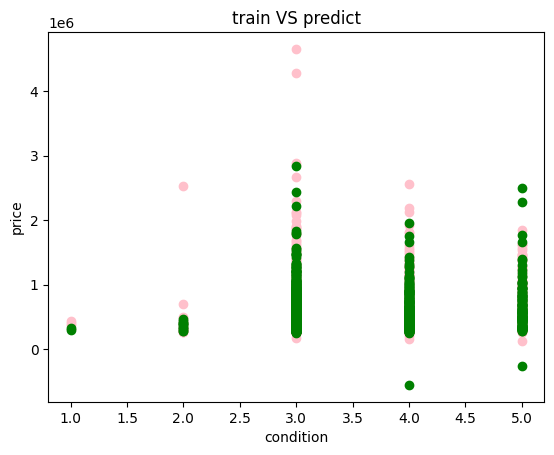

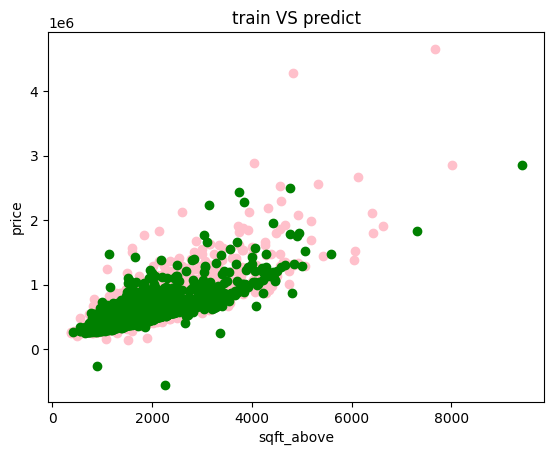

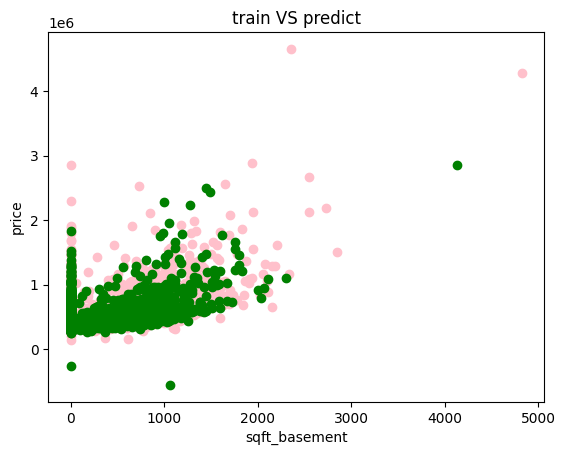

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_poly, color="pink")
    plt.scatter(X_test[i], y_test_pred_poly, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Dari hasil model polynomial regression ini juga tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. Namun model ini lebih baik dari linear regrssion

####Random Forest Regressor<br>
Random Forest Regressor adalah salah satu varian dari algoritma Random Forest, yang awalnya dibuat untuk masalah klasifikasi tetapi kemudian dimodifikasi untuk menangani masalah regresi. Random Forest Regressor adalah contoh pengajaran kelompok, yang berarti bahwa algoritma ini menggabungkan prediksi dari beberapa model yang lebih sederhana (biasanya pohon keputusan) untuk membuat prediksi.


Untuk kasus ini, menggunakan jumlah pohon keputusan sebesar 100. Kemudian menggunakan criterion (untuk mengukur kualitas pemisahan pada setiap node pohon keputusan) mengacu pada MSE. Dan menggunakan random state 42 serta menggunakan semua core (prosesor) yang tersedia pada komputer Anda untuk melatih model secara paralel (value dari n_jobs = -1)

In [ ]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', random_state = 42, n_jobs = -1)

f=forest.fit(X_train_standard,y_train)

y_train_pred_forest = f.predict(X_train_standard)
y_test_pred_forest = f.predict(X_test_standard)


print("Evaluasi Data Train")
print("R2 score Random Forest regression data train:")
print(r2_score(y_train, y_train_pred_forest))
print("\nMSE Random Forest regression data train:")
print(mean_squared_error(y_train, y_train_pred_forest))
print("\nMAE Random Forest regression data train:")
print(mean_absolute_error(y_train, y_train_pred_forest))
print("\nRMSE Random Forest regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_forest)))


print("\n\nEvaluasi Data Test")
print("R2 score Random Forest regression data test:")
print(r2_score(y_test, y_test_pred_forest))
print("\nMSE Random Forest regression data test:")
print(mean_squared_error(y_test, y_test_pred_forest))
print("\nMAE Random Forest regression data test:")
print(mean_absolute_error(y_test, y_test_pred_forest))
print("\nRMSE Random Forest regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_forest)))


Evaluasi Data Train
R2 score Random Forest regression data train:
0.9938939733645353

MSE Random Forest regression data train:
503937628.9130435

MAE Random Forest regression data train:
9156.537267080745

RMSE Random Forest regression data train:
22448.555163151224


Evaluasi Data Test
R2 score Random Forest regression data test:
0.9580050423253794

MSE Random Forest regression data test:
3220850342.0289855

MAE Random Forest regression data test:
25147.144927536232

RMSE Random Forest regression data test:
56752.535996455576


Text(0.5, 0, 'y_test')

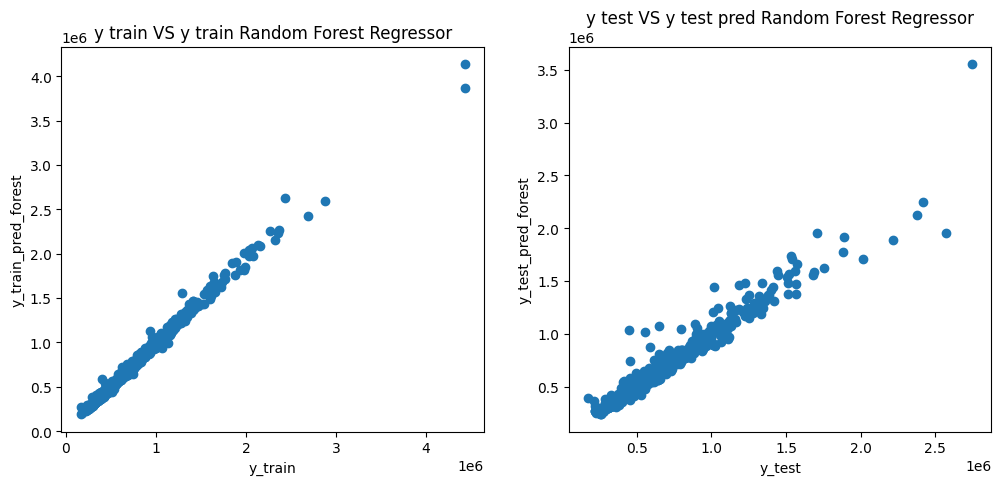

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_forest)
plt.title("y train VS y train Random Forest Regressor")
plt.ylabel("y_train_pred_forest")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_forest)
plt.title("y test VS y test pred Random Forest Regressor")
plt.ylabel("y_test_pred_forest")
plt.xlabel("y_test")

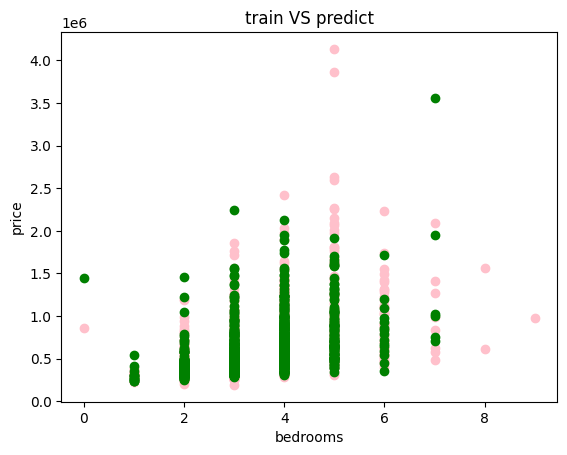

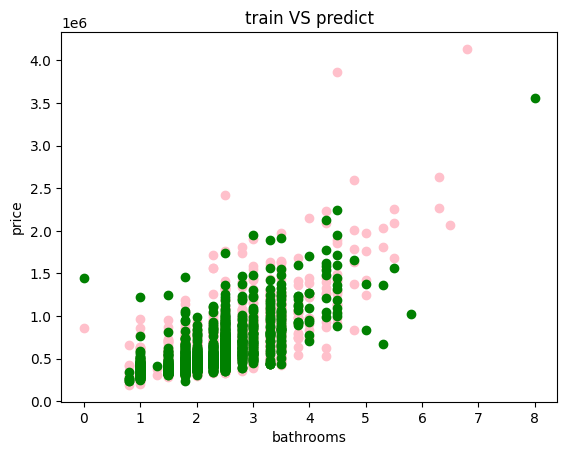

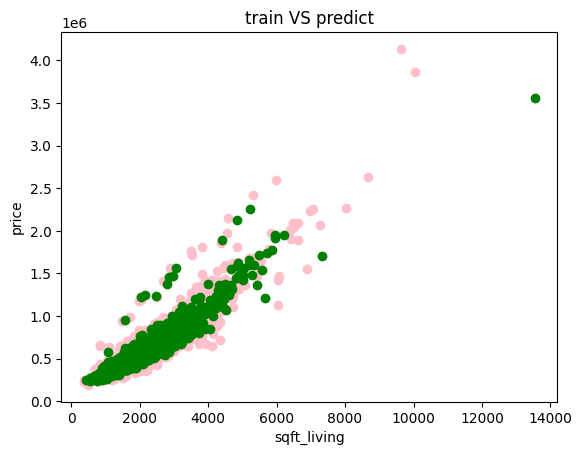

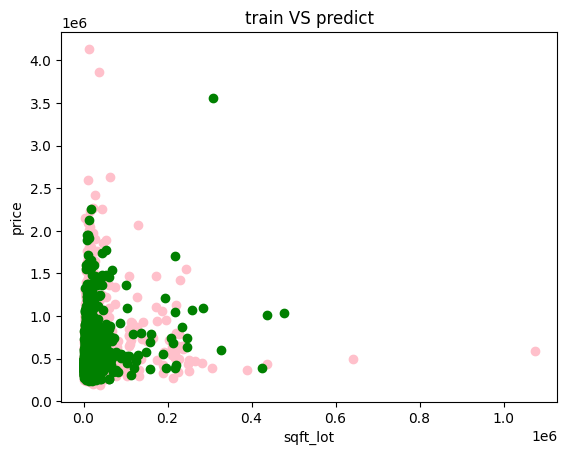

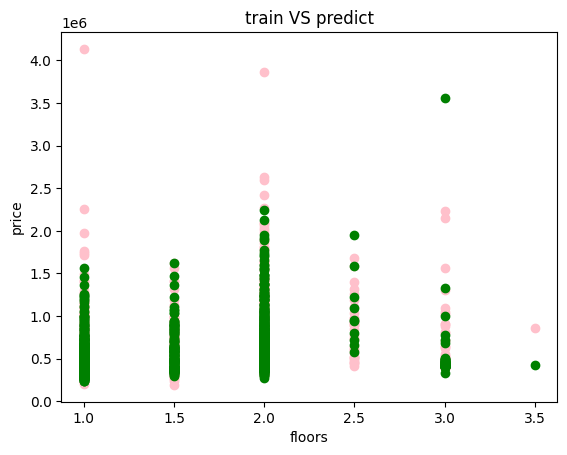

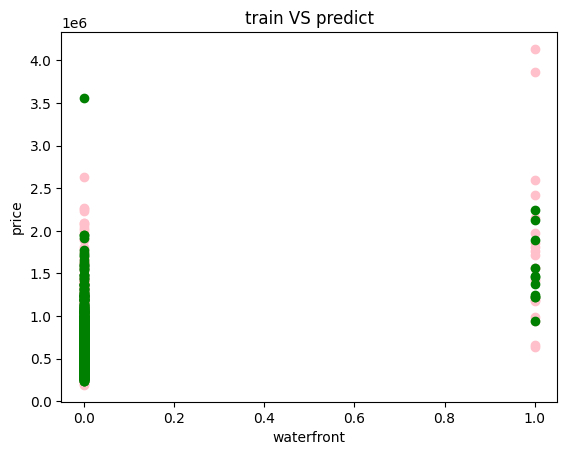

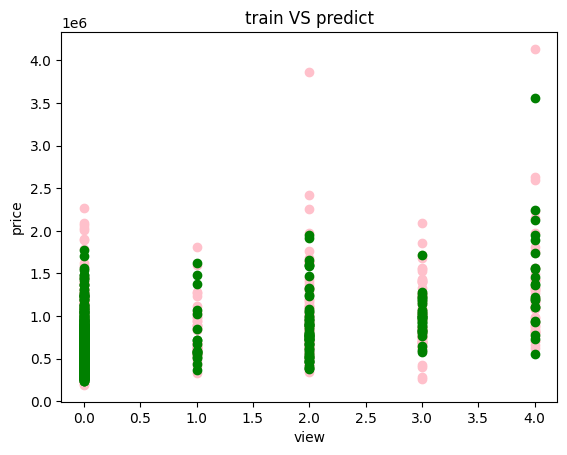

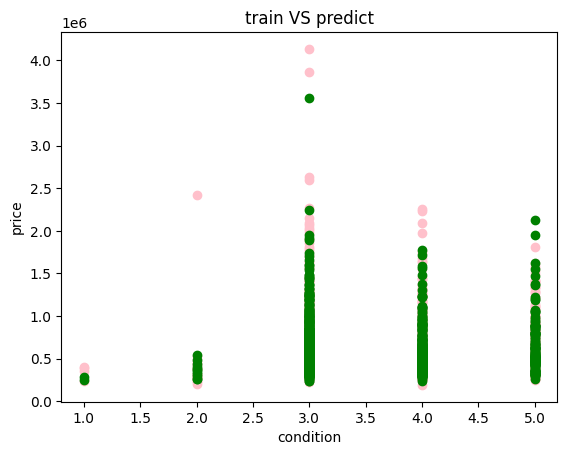

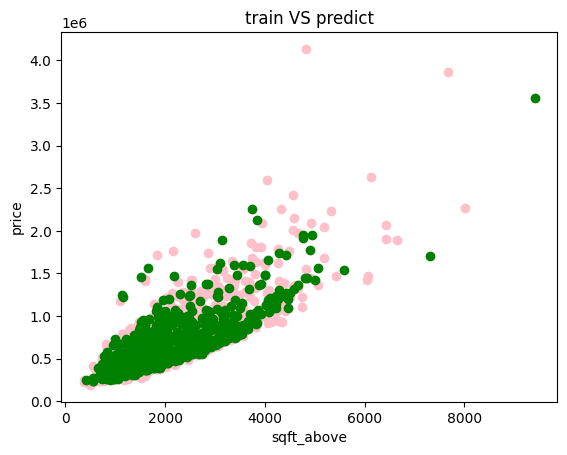

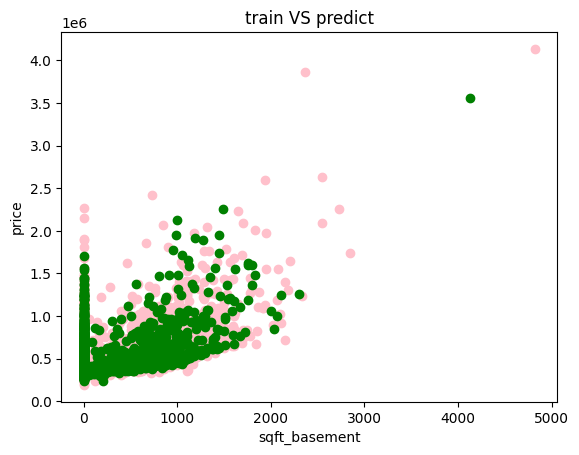

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_forest, color="pink")
    plt.scatter(X_test[i], y_test_pred_forest, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Random Forest Regressor ini memungkinkan model yang overfit untuk kasus prediksi harga rumah. Hal ini terlihat dari R-squared pada data train 0.99 dengan data test 0.95 (cukup berbeda jauh)

#### Ridge Regression <br>
Untuk mengatasi masalah overfitting dan multikolinieritas dalam model regresi linier, regresi ridge adalah variasi dari regresi linier yang menambahkan komponen regularisasi L2 (juga disebut sebagai "penalitas L2") ke dalam fungsi tujuan yang digunakan untuk melatih model.<br>

Metrik yang digunakan adalah negatif dari Mean Absolute Error (MAE), yang berarti model akan mencoba untuk meminimalkan MAE selama proses validasi silang.

In [ ]:
alpha = 10**np.linspace(10,-2,100)*0.5
ridge = RidgeCV(alphas=alpha, cv=10, scoring='neg_mean_absolute_error')

ridge.fit(X_train_standard,y_train)

y_train_pred_ridge = ridge.predict(X_train_standard)
y_test_pred_ridge = ridge.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Ridge regression data train:")
print(r2_score(y_train, y_train_pred_ridge))
print("\nMSE Ridge regression data train:")
print(mean_squared_error(y_train, y_train_pred_ridge))
print("\nMAE Ridge regression data train:")
print(mean_absolute_error(y_train, y_train_pred_ridge))
print("\nRMSE Ridge regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))


print("\n\nEvaluasi Data Test")
print("R2 score Ridge regression data test:")
print(r2_score(y_test, y_test_pred_ridge))
print("\nMSE Ridge regression data test:")
print(mean_squared_error(y_test, y_test_pred_ridge))
print("\nMAE Ridge regression data test:")
print(mean_absolute_error(y_test, y_test_pred_ridge))
print("\nRMSE Ridge regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))


Evaluasi Data Train
R2 score Ridge regression data train:
0.9240702711609459

MSE Ridge regression data train:
6266570684.923236

MAE Ridge regression data train:
50468.98994561893

RMSE Ridge regression data train:
79161.67434385933


Evaluasi Data Test
R2 score Ridge regression data test:
0.9245362217863679

MSE Ridge regression data test:
5787779041.317315

MAE Ridge regression data test:
49961.13679782776

RMSE Ridge regression data test:
76077.45422473937


Text(0.5, 0, 'y_test')

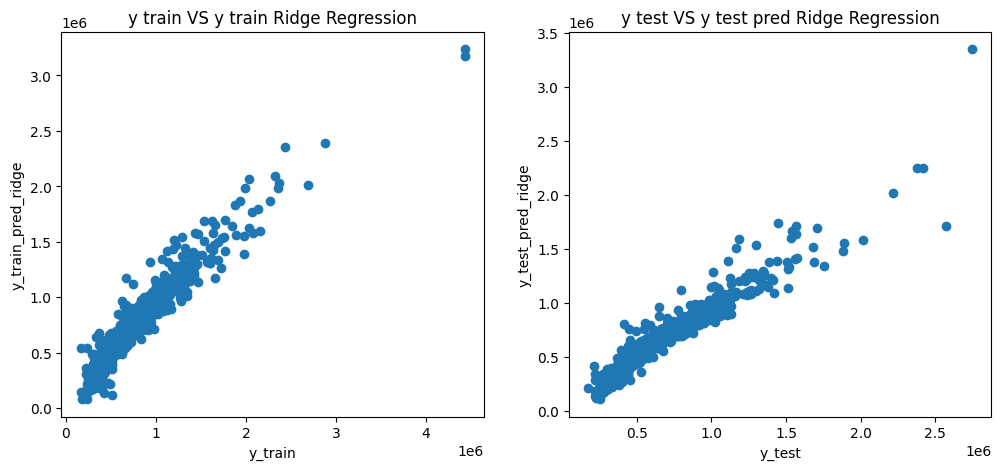

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ridge)
plt.title("y train VS y train Ridge Regression")
plt.ylabel("y_train_pred_ridge")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge)
plt.title("y test VS y test pred Ridge Regression")
plt.ylabel("y_test_pred_ridge")
plt.xlabel("y_test")

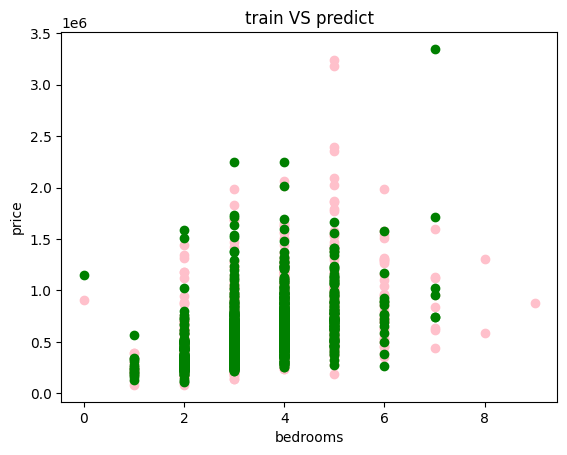

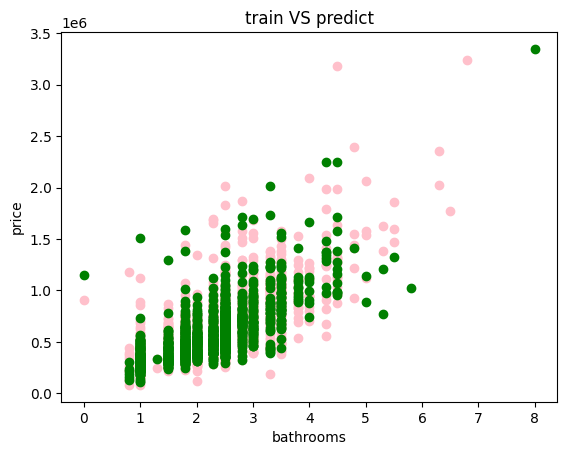

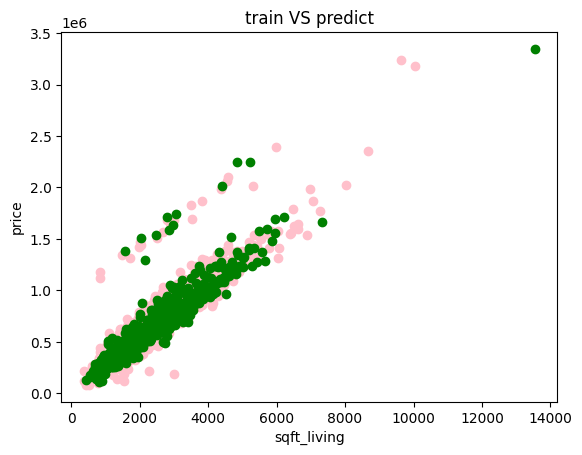

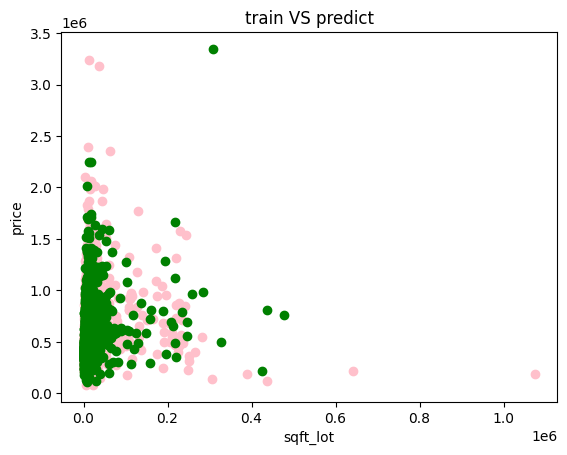

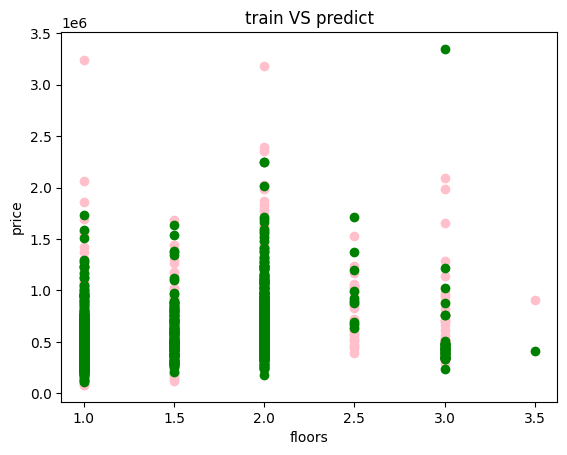

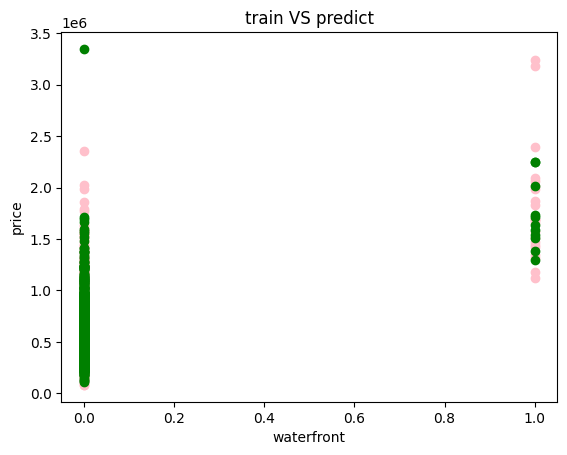

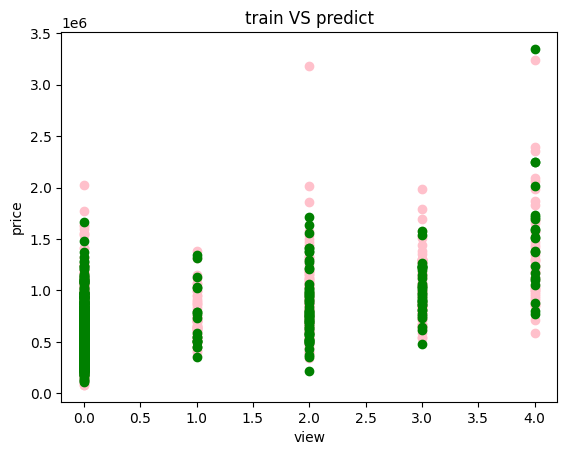

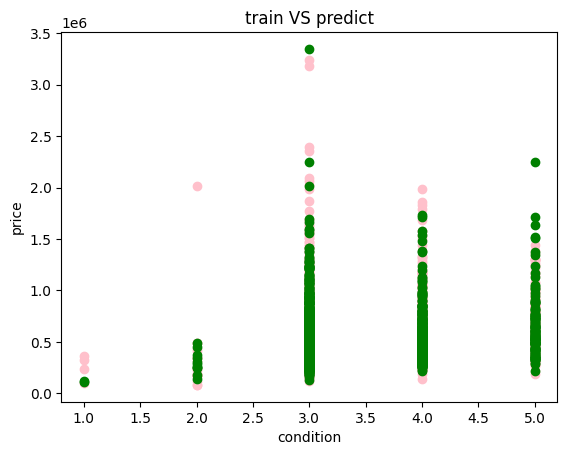

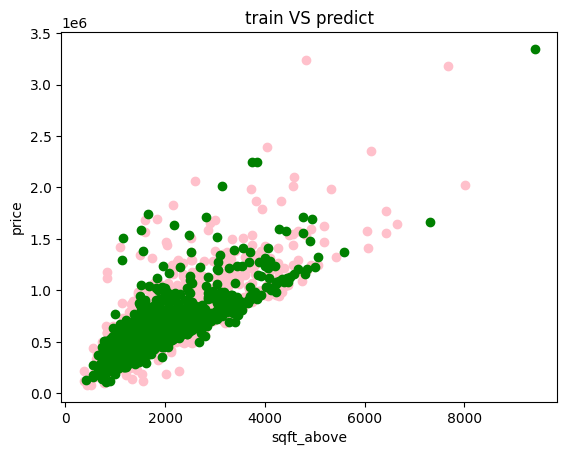

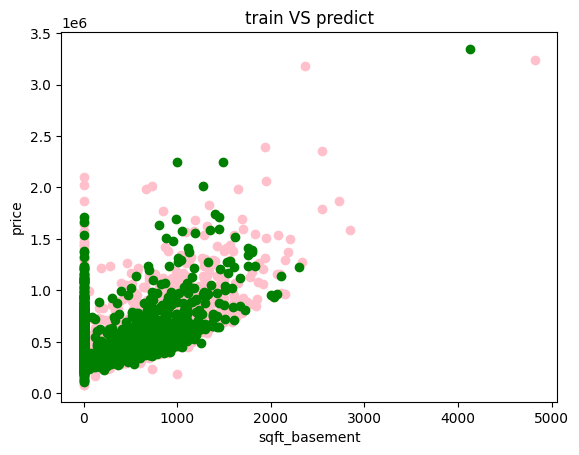

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_ridge, color="pink")
    plt.scatter(X_test[i], y_test_pred_ridge, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Dari hasil model Ridge Regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. Namun model ini tidak lebih baik dari polynomial regression

####Lasso Regression <br>
Seperti Ridge Regression, Lasso Regression juga digunakan untuk mengatasi masalah overfitting dalam model regresi linier. Namun, Lasso Regression menggunakan metode regularisasi L1 (penalitas L1) sebagai komponen utama fungsi tujuan yang digunakan untuk melatih model regresi linier.
<br><br>
Untuk kasus ini menggunakan mencoba 100 nilai alpha yang berbeda untuk menemukan yang optimal.Semakin besar nilai alpha, semakin banyak koefisien yang akan ditekan menjadi nol.
<br><br>
Selain itu juga membatasi jumlah maksimum melakukan iterasi adalah 1000 iterasi

In [ ]:
lasso = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso.fit(X_train_standard, y_train)

y_train_pred_lasso = lasso.predict(X_train_standard)
y_test_pred_lasso = lasso.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Lasso regression data train:")
print(r2_score(y_train, y_train_pred_lasso))
print("\nMSE Lasso regression data train:")
print(mean_squared_error(y_train, y_train_pred_lasso))
print("\nMAE Lasso regression data train:")
print(mean_absolute_error(y_train, y_train_pred_lasso))
print("\nRMSE Lasso regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))


print("\n\nEvaluasi Data Test")
print("R2 score Lasso regression data test:")
print(r2_score(y_test, y_test_pred_lasso))
print("\nMSE Lasso regression data test:")
print(mean_squared_error(y_test, y_test_pred_lasso))
print("\nMAE Lasso regression data test:")
print(mean_absolute_error(y_test, y_test_pred_lasso))
print("\nRMSE Lasso regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))



Evaluasi Data Train
R2 score Lasso regression data train:
0.9270765708406734

MSE Lasso regression data train:
6018457202.482024

MAE Lasso regression data train:
51412.93775481403

RMSE Lasso regression data train:
77578.71616933361


Evaluasi Data Test
R2 score Lasso regression data test:
0.9224968605885333

MSE Lasso regression data test:
5944190133.869399

MAE Lasso regression data test:
50991.109658133195

RMSE Lasso regression data test:
77098.57413642226


Text(0.5, 0, 'y_test')

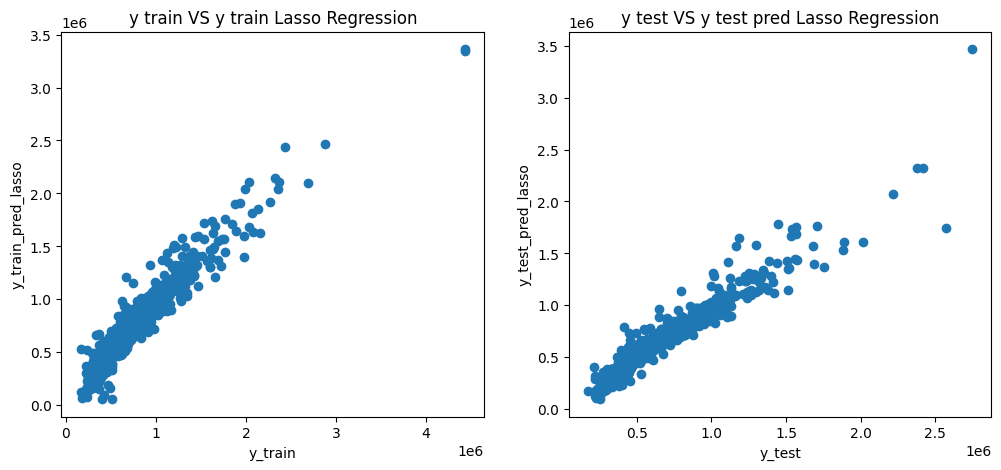

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_lasso)
plt.title("y train VS y train Lasso Regression")
plt.ylabel("y_train_pred_lasso")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lasso)
plt.title("y test VS y test pred Lasso Regression")
plt.ylabel("y_test_pred_lasso")
plt.xlabel("y_test")

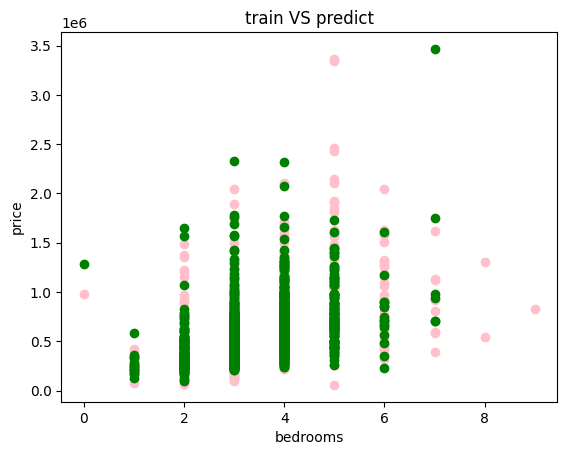

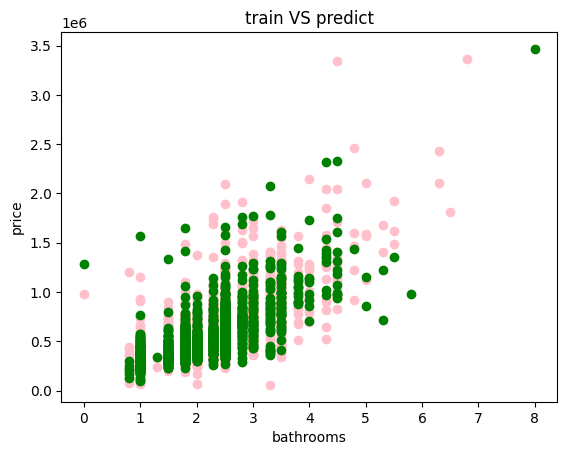

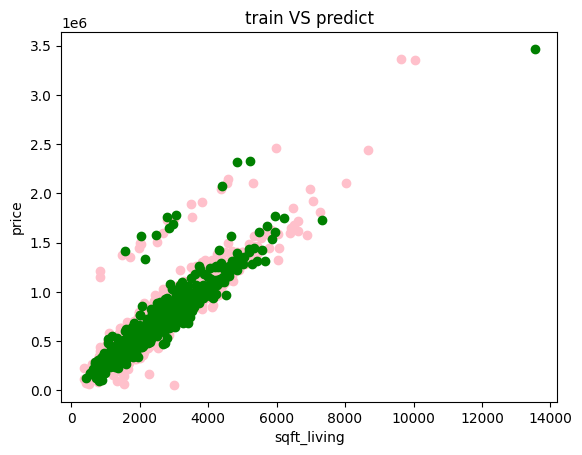

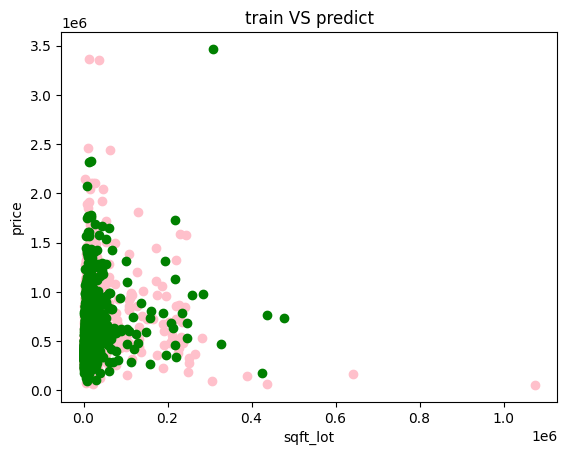

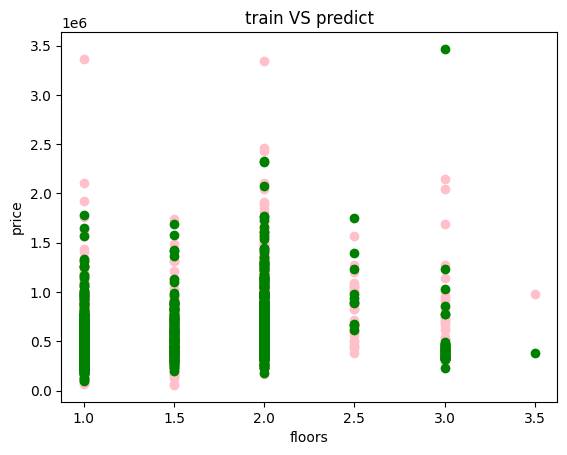

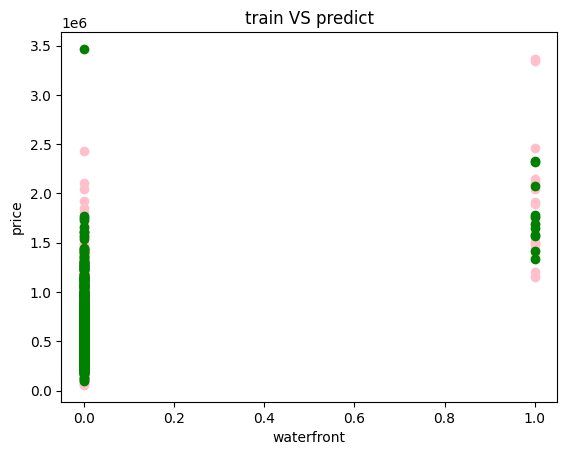

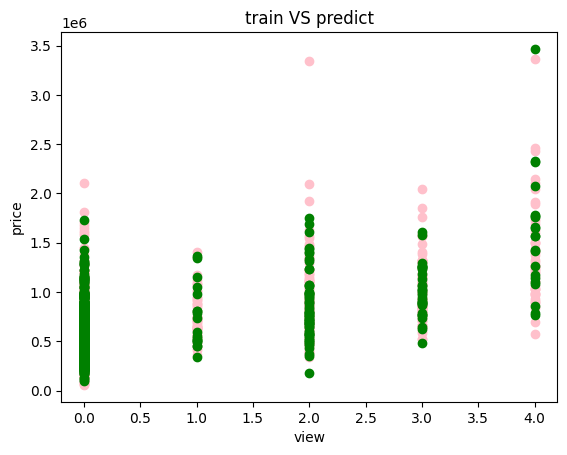

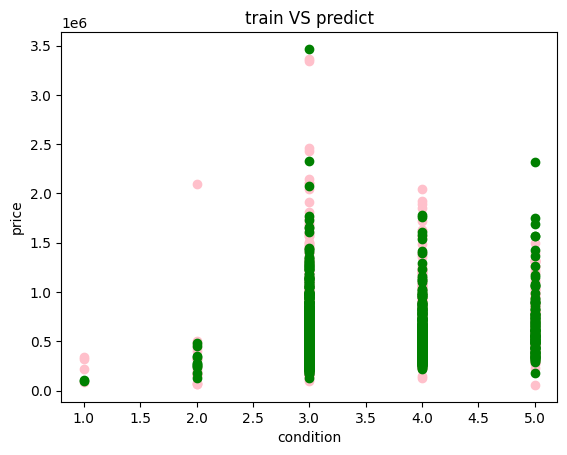

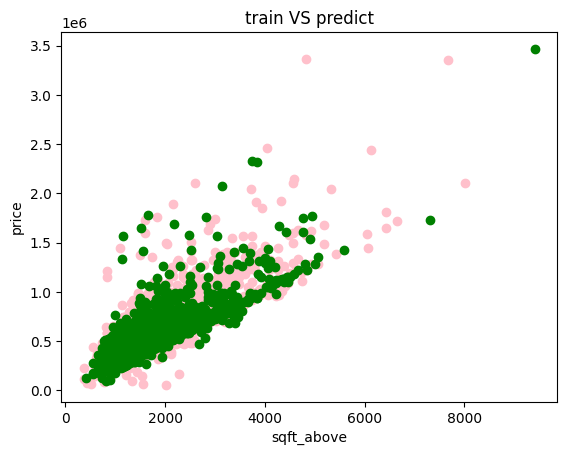

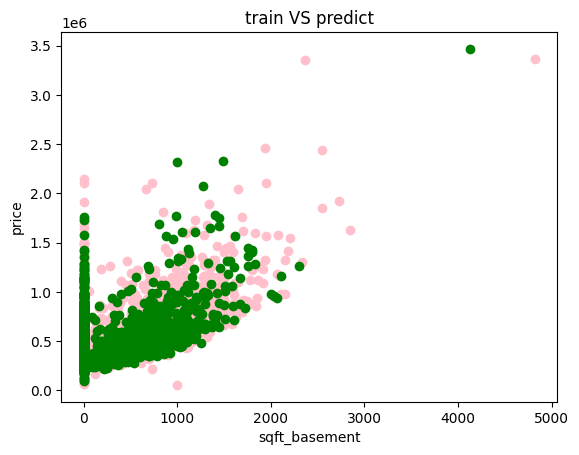

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_lasso, color="pink")
    plt.scatter(X_test[i], y_test_pred_lasso, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Dari hasil model Lasso Regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. Namun model ini tidak lebih baik dari polynomial regression

####Elastic Net<br>

Elastic Net Regression menggabungkan elemen dari Ridge Regression (L2 Regularization) dan Lasso Regression (L1 Regularization). Tujuannya adalah untuk melakukan seleksi fitur otomatis dan menyelesaikan masalah overfitting dan multikolinieritas dalam model regresi.


In [ ]:
elasticnet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.01, n_alphas=100, max_iter=1000)
elasticnet.fit(X_train_standard, y_train)

y_train_pred_elasticnet = elasticnet.predict(X_train_standard)
y_test_pred_elasticnet = elasticnet.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score ElasticNet regression data train:")
print(r2_score(y_train, y_train_pred_elasticnet))
print("\nMSE ElasticNet regression data train:")
print(mean_squared_error(y_train, y_train_pred_elasticnet))
print("\nMAE ElasticNet regression data train:")
print(mean_absolute_error(y_train, y_train_pred_elasticnet))
print("\nRMSE ElasticNet regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_elasticnet)))


print("\n\nEvaluasi Data Test")
print("R2 score ElasticNet regression data test:")
print(r2_score(y_test, y_test_pred_elasticnet))
print("\nMSE ElasticNet regression data test:")
print(mean_squared_error(y_test, y_test_pred_elasticnet))
print("\nMAE ElasticNet regression data test:")
print(mean_absolute_error(y_test, y_test_pred_elasticnet))
print("\nRMSE ElasticNet regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_elasticnet)))


Evaluasi Data Train
R2 score ElasticNet regression data train:
0.9262739349676381

MSE ElasticNet regression data train:
6084699694.185006

MAE ElasticNet regression data train:
51149.61631958853

RMSE ElasticNet regression data train:
78004.48509018571


Evaluasi Data Test
R2 score ElasticNet regression data test:
0.9224310010768976

MSE ElasticNet regression data test:
5949241302.922156

MAE ElasticNet regression data test:
50907.9574949417

RMSE ElasticNet regression data test:
77131.32504321546


Text(0.5, 0, 'y_test')

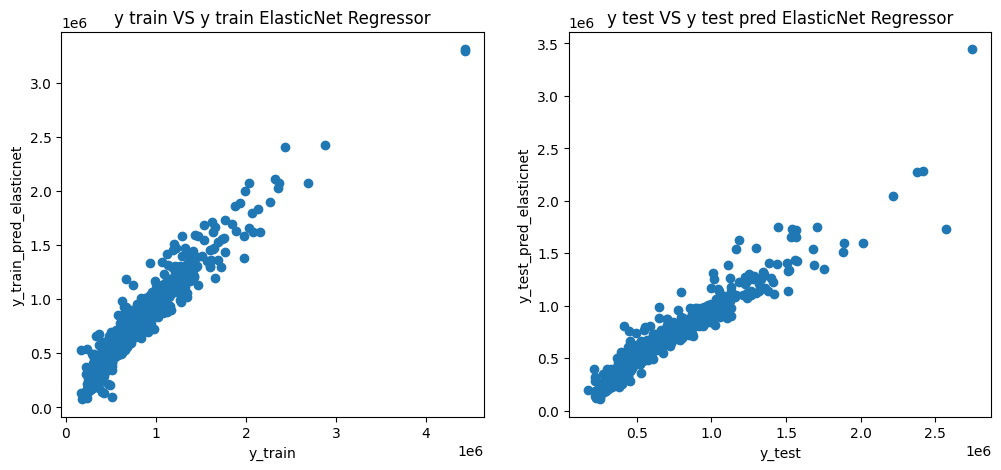

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_elasticnet)
plt.title("y train VS y train ElasticNet Regressor")
plt.ylabel("y_train_pred_elasticnet")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_elasticnet)
plt.title("y test VS y test pred ElasticNet Regressor")
plt.ylabel("y_test_pred_elasticnet")
plt.xlabel("y_test")

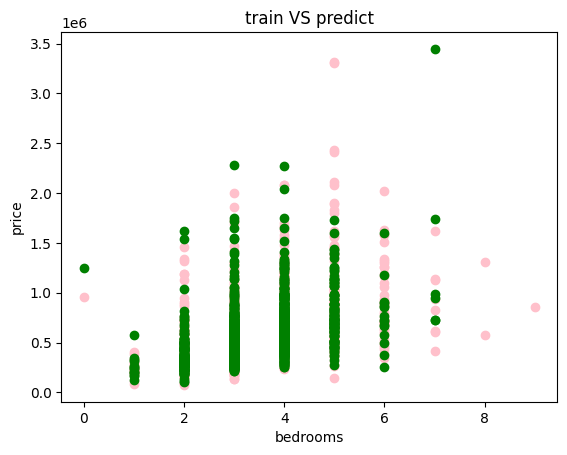

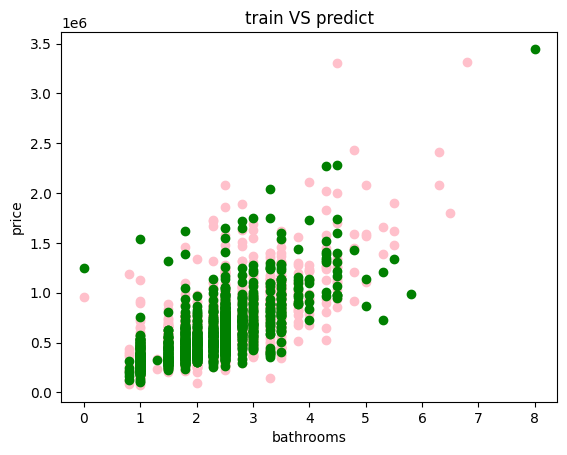

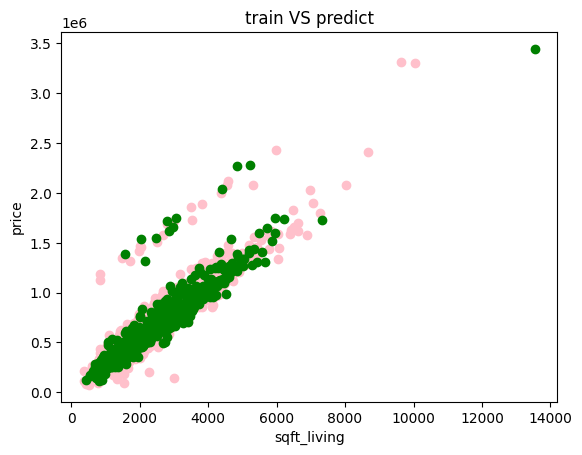

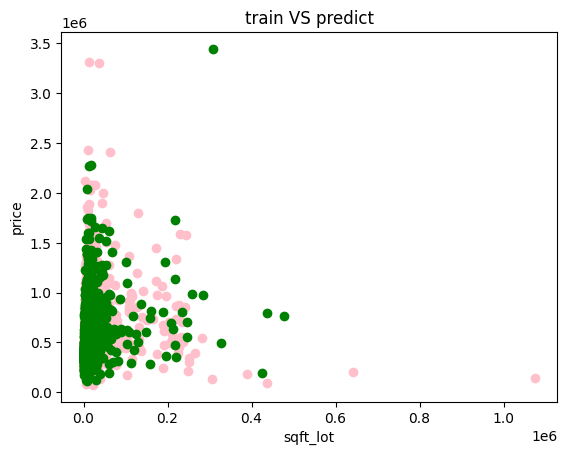

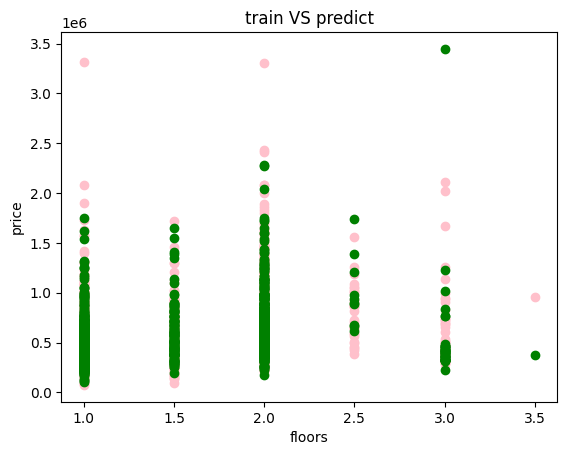

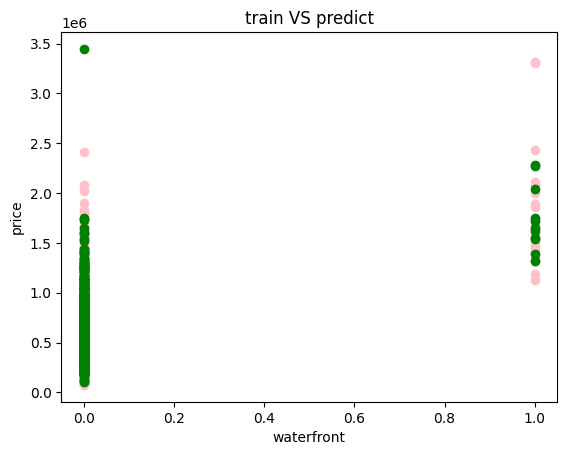

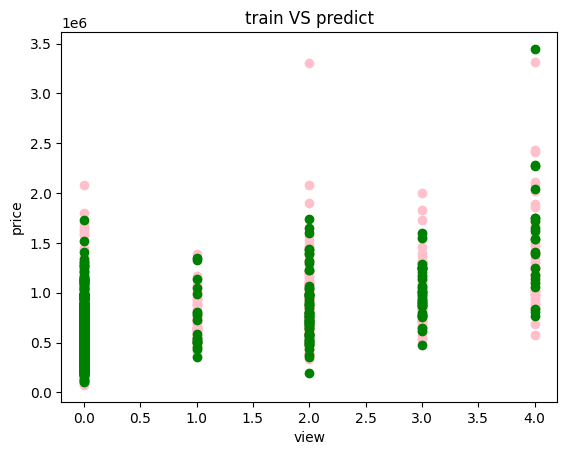

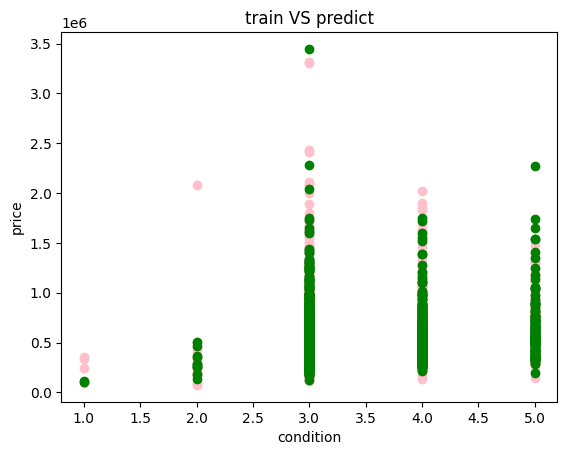

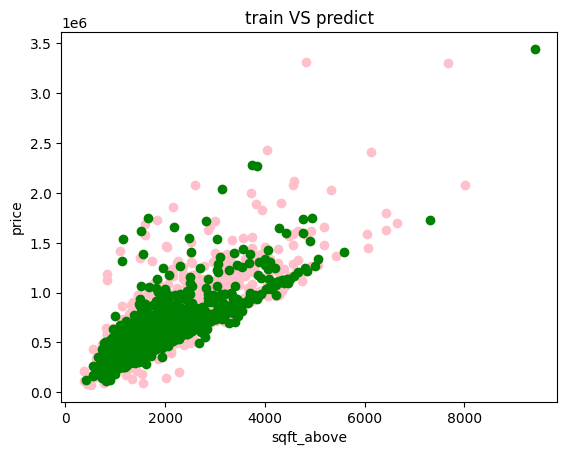

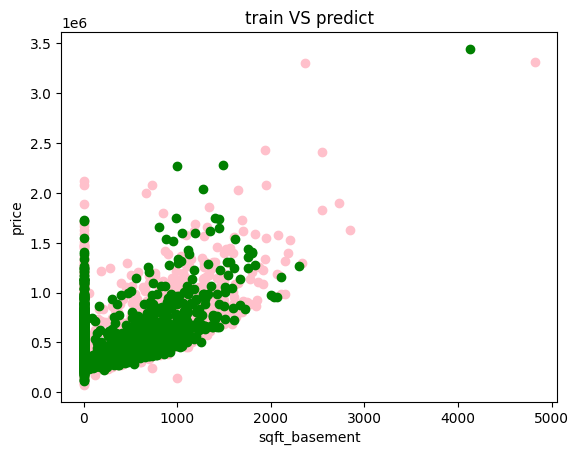

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_elasticnet, color="pink")
    plt.scatter(X_test[i], y_test_pred_elasticnet, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Dari hasil model ElasticNet Regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. Namun model ini tidak lebih baik dari polynomial regression

####Decision Tree Regressor<br>

Untuk melakukan tugas regresi, algoritma Decision Tree Regressor memodelkan hubungan antara variabel independen (prediktor) dan variabel dependen (target) dalam bentuk pohon keputusan. Ini adalah versi algoritma Decision Tree yang umum digunakan untuk tugas klasifikasi.


In [ ]:
dts = DecisionTreeRegressor()
dts.fit(X_train_standard, y_train)

y_train_pred_dts = dts.predict(X_train_standard)
y_test_pred_dts = dts.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Decision Tree regression data train:")
print(r2_score(y_train, y_train_pred_dts))
print("\nMSE Decision Tree regression data train:")
print(mean_squared_error(y_train, y_train_pred_dts))
print("\nMAE Decision Tree regression data train:")
print(mean_absolute_error(y_train, y_train_pred_dts))
print("\nRMSE Decision Tree regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_dts)))


print("\n\nEvaluasi Data Test")
print("R2 score Decision Tree regression data test:")
print(r2_score(y_test, y_test_pred_dts))
print("\nMSE Decision Tree regression data test:")
print(mean_squared_error(y_test, y_test_pred_dts))
print("\nMAE Decision Tree regression data test:")
print(mean_absolute_error(y_test, y_test_pred_dts))
print("\nRMSE Decision Tree regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_dts)))


Evaluasi Data Train
R2 score Decision Tree regression data train:
1.0

MSE Decision Tree regression data train:
0.0

MAE Decision Tree regression data train:
0.0

RMSE Decision Tree regression data train:
0.0


Evaluasi Data Test
R2 score Decision Tree regression data test:
0.9065005428174889

MSE Decision Tree regression data test:
7171045652.173913

MAE Decision Tree regression data test:
34586.23188405797

RMSE Decision Tree regression data test:
84682.02673633829


Text(0.5, 0, 'y_test')

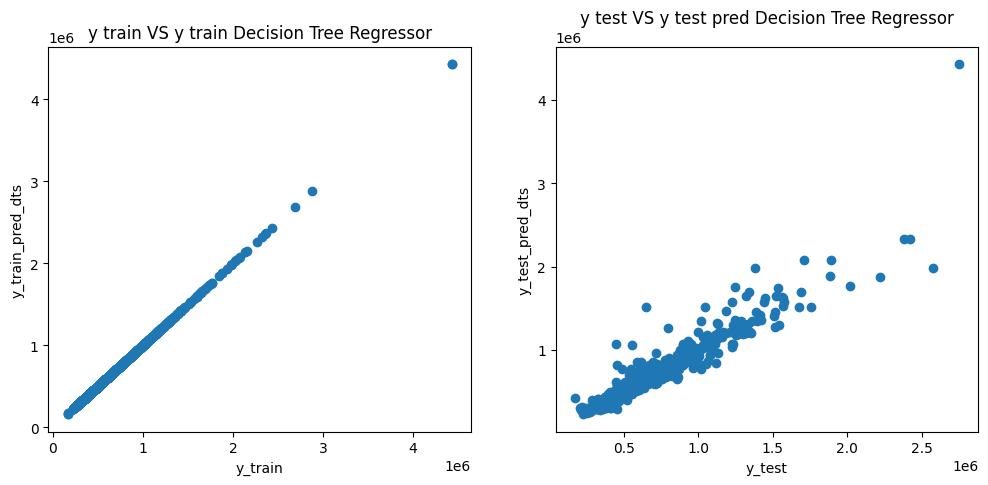

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_dts)
plt.title("y train VS y train Decision Tree Regressor")
plt.ylabel("y_train_pred_dts")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_dts)
plt.title("y test VS y test pred Decision Tree Regressor")
plt.ylabel("y_test_pred_dts")
plt.xlabel("y_test")

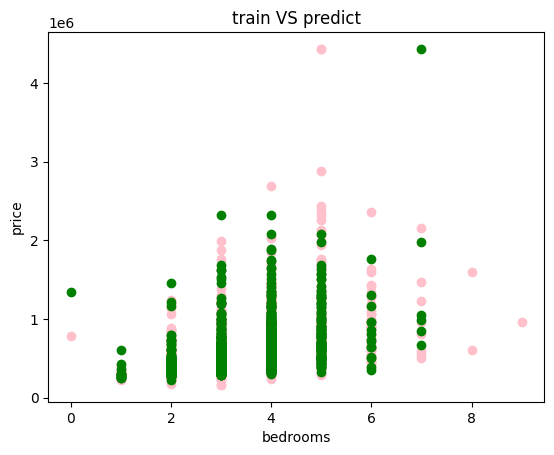

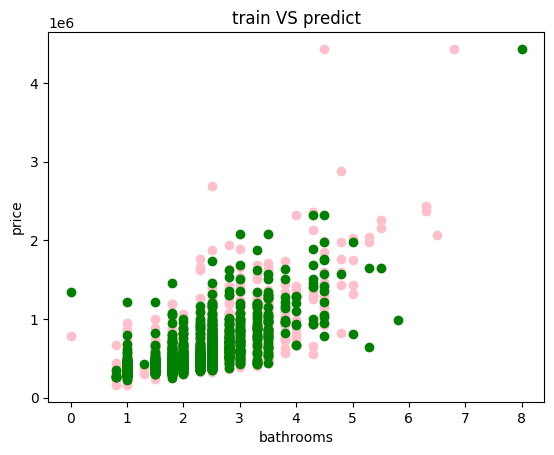

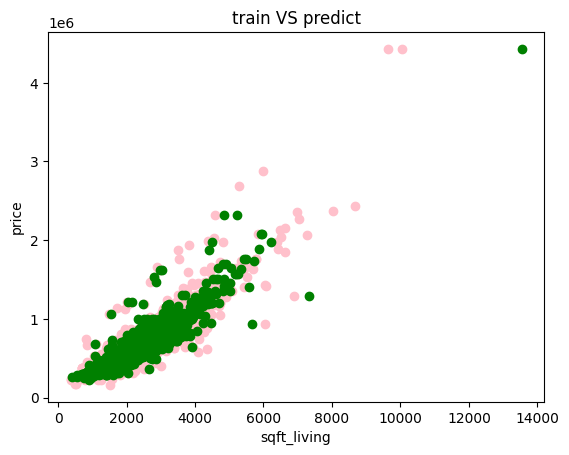

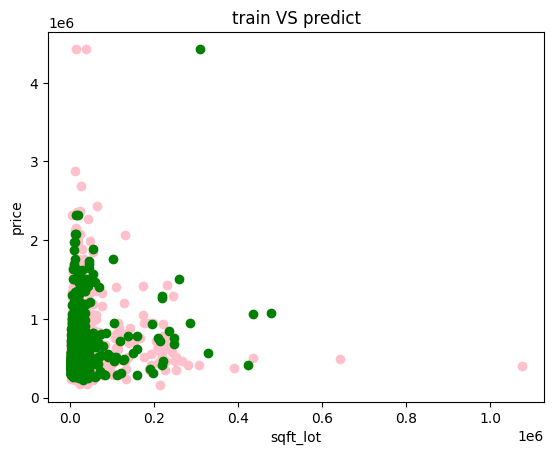

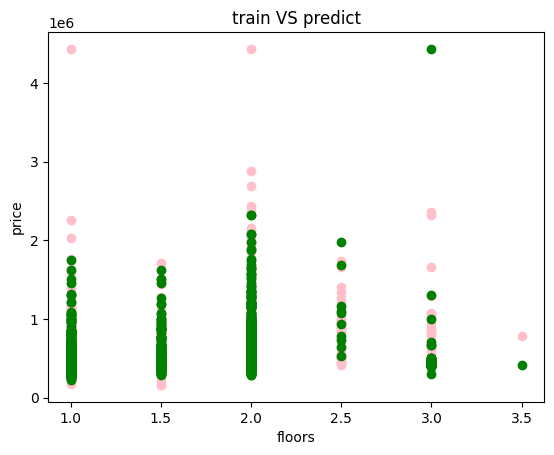

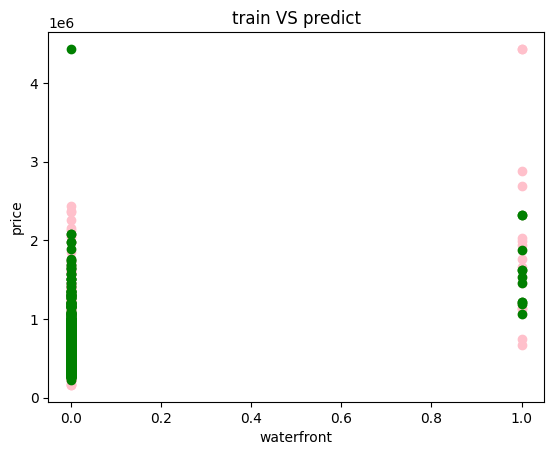

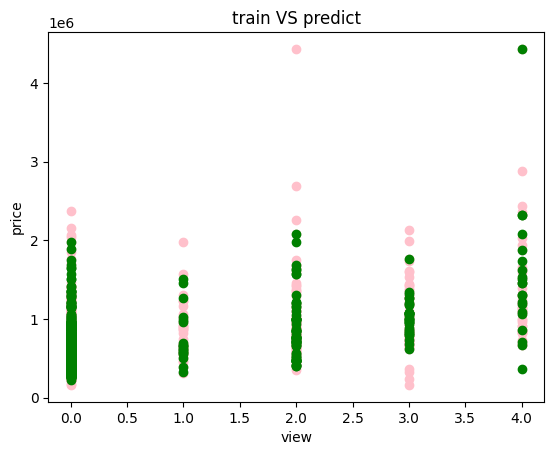

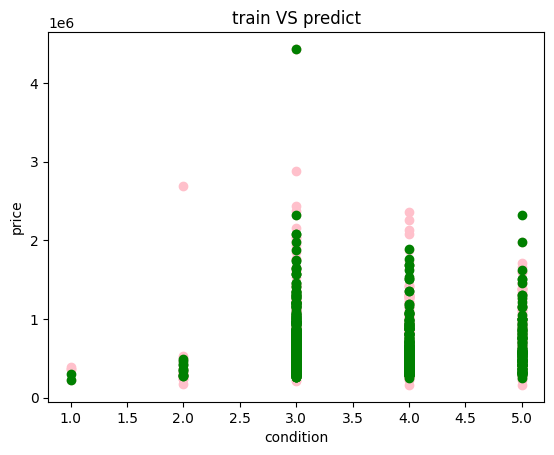

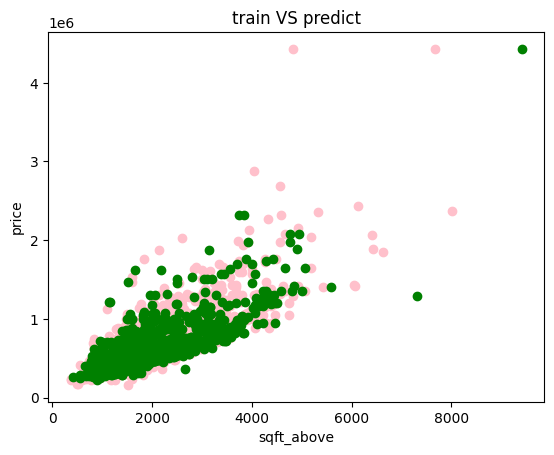

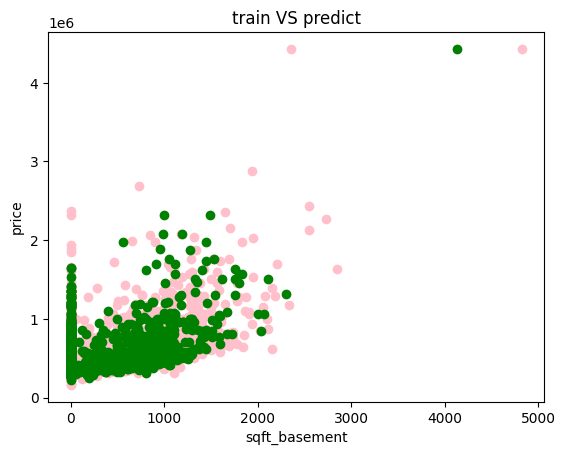

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_dts, color="pink")
    plt.scatter(X_test[i], y_test_pred_dts, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"price")
    plt.show()

Dari hasil yang diperoleh, dapat dikatakan Decision Tree Regressor ini overfit karena memiliki nilai R-squared yang berbeda jauh antara data train dan data test. Sehingga tidak cocok untuk kasus house price prediction

###Kesimpulan<br>
Berdasarkan hasil yang telah diperoleh dengan melakukan 7 model regresi, model regresi yang paling tepat untuk kasus prediksi harga rumah ini adalah Polynomial Regression dengan hasil R-squared data train 0.98 dengan data test 0.97.

##Insurance Regression

###1. Membaca data csv

Data csv insurance ini dibaca dari csv yang sudah diupload digithub

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abigailvania99/machineLearning/main/insurance.csv")

<li> Menampilkan sampel 5 data teratas

In [ ]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

###2. Memeriksa data null

Kemudian, melakukan pengecekan dari dataset, apakah ada data yang null

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Ternyata tidak ada data yang null atau kosong

###3. Mengetahui tipe data pada masing-masing atribut

Hal ini dilakukan untuk mempermudah melakukan visualisasi dan regresi

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

###4. Meringkas Data

Langkah ini dilakukan untuk mempermudah untuk melihat rata-rata, standar deviasi, minimal, maksimum value dan lain-lain

In [ ]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

###5. Memvisualisasikan hubungan

Langkah ini dilakukan melihat hubungan antar atribut yang memiliki tipe data int

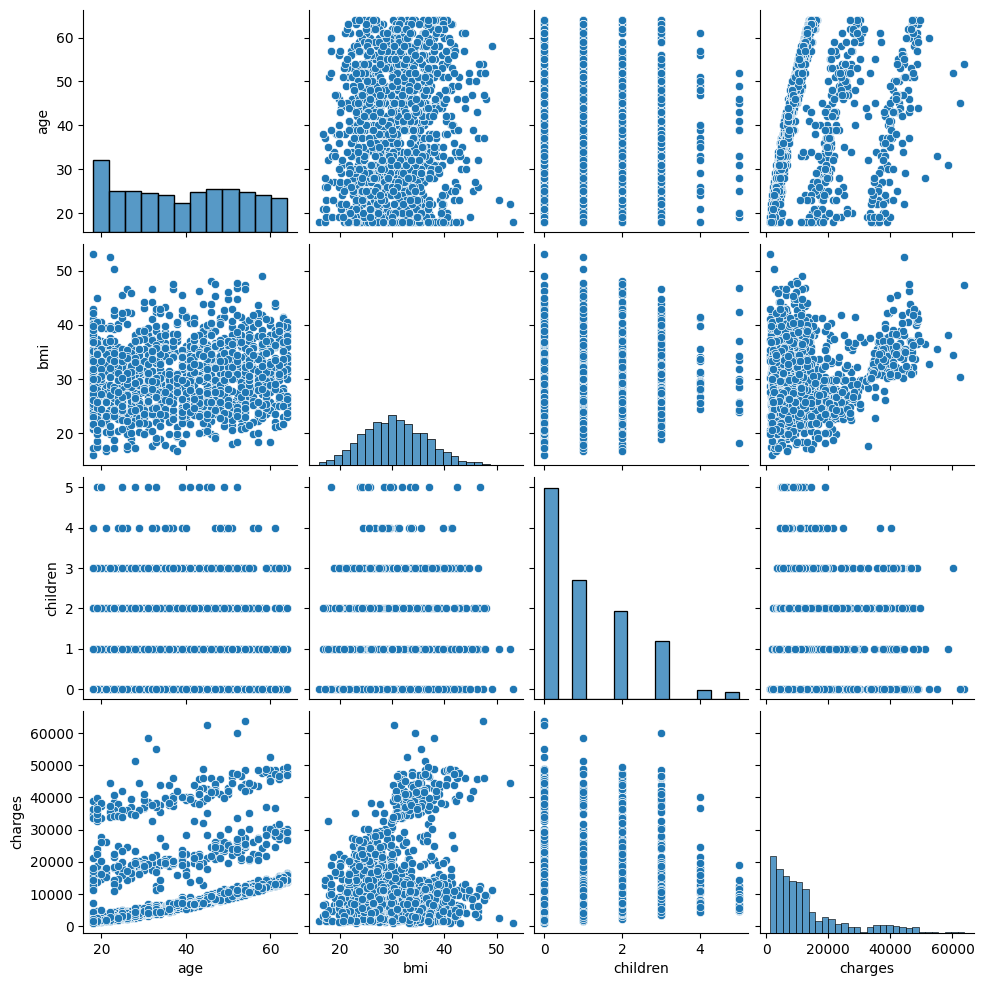

In [ ]:
sns.pairplot(df)

###6. Membuat visualisasai hubungan antar atribut dengan atribut Charges

<li> Visualisasi atribut yang bertipe data int <br>
Visualisasai antar atribut yang bertipe data int dengan charges dilakukan dengan menggunakan scatter plot

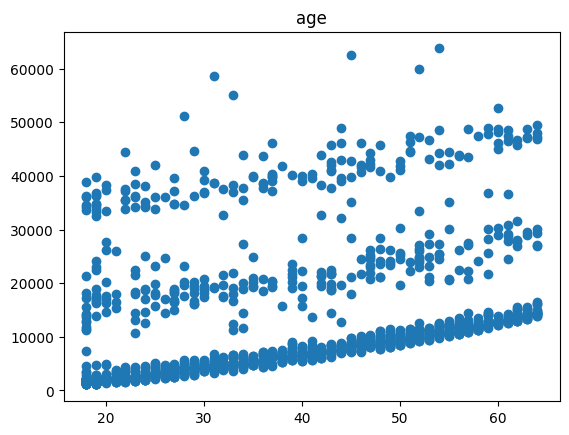

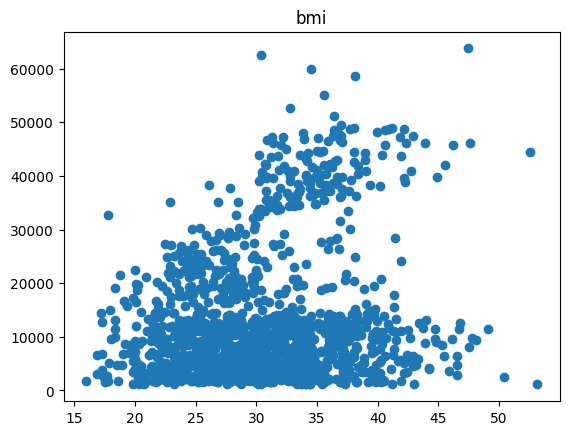

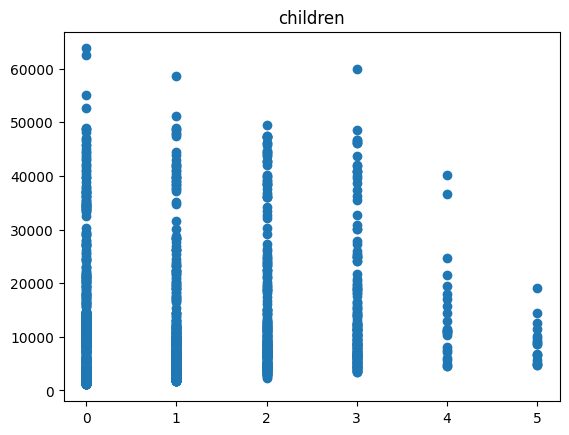

In [ ]:
intdf = df.select_dtypes(exclude = ['object'])
for i in intdf:
    if i != 'charges':
      plt.scatter(df[i],df['charges'])
      plt.title(i)
      plt.show()

<li> Visualisasi atribut dengen menggunakan boxplot <br>
Visualisasai menggunakan boxplot dilakukan untuk melihat apakah ada data outlier

In [ ]:
objdf = df.select_dtypes(exclude = ['int',float])
print(objdf.columns)

Index(['sex', 'smoker', 'region'], dtype='object')


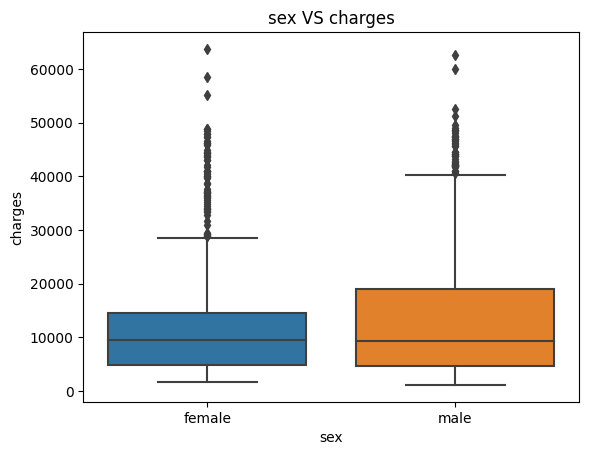

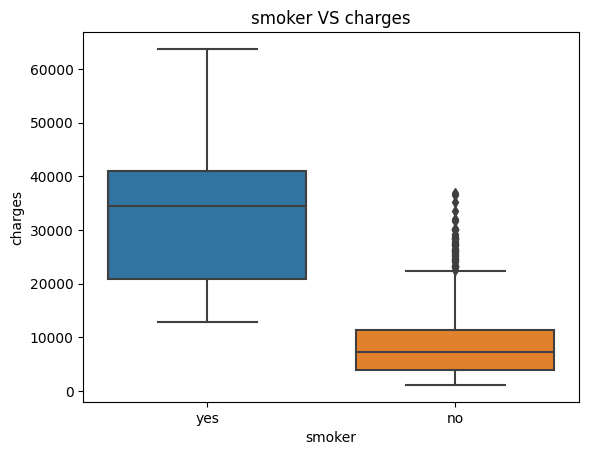

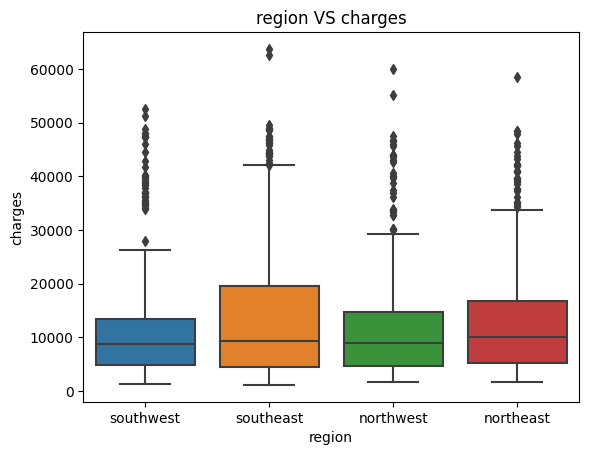

In [ ]:
for i in objdf:
  sns.boxplot(x = df[i], y = df["charges"])
  plt.title(f"{i} VS charges")
  plt.show()

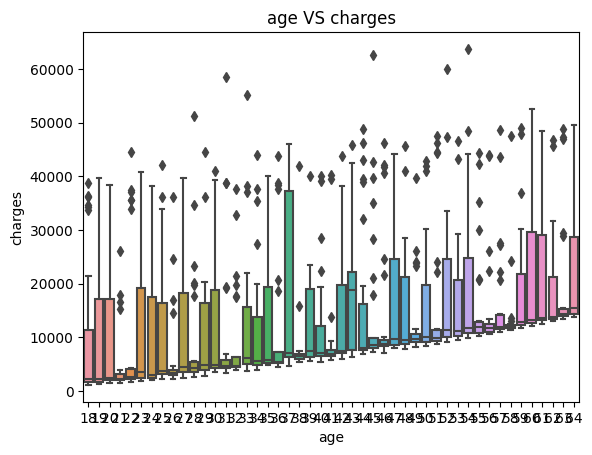

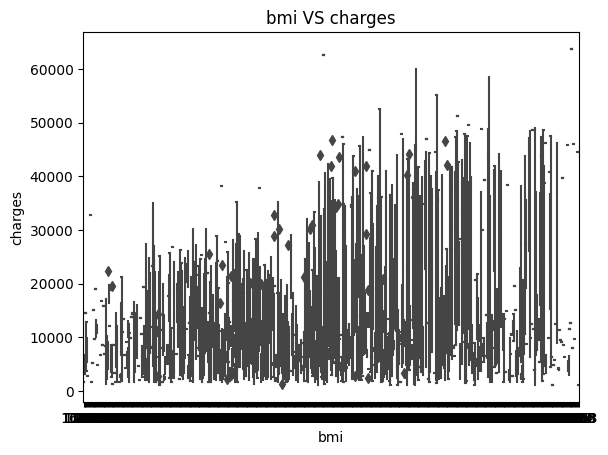

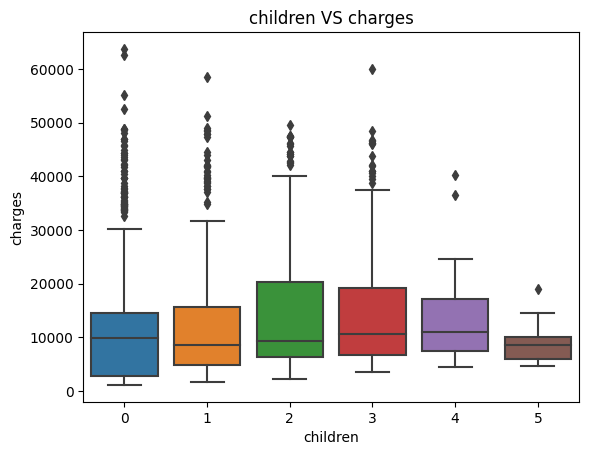

In [ ]:
for i in intdf:
  if i !='charges':
    sns.boxplot(x = df[i], y = df["charges"])
    plt.title(f"{i} VS charges")
    plt.show()

###7. Mengubah tipe data
karena sex, smoker dan region memiliki tipe data object dan data masih berupa kategorikal, maka perlu dilakukan transformasi ke numerik

In [ ]:
dfcopy = df.copy()

le = LabelEncoder()
le.fit(dfcopy.sex.drop_duplicates())
dfcopy.sex = le.transform(dfcopy.sex)

le.fit(dfcopy.smoker.drop_duplicates())
dfcopy.smoker = le.transform(dfcopy.smoker)

le.fit(dfcopy.region.drop_duplicates())
dfcopy.region = le.transform(dfcopy.region)

###8. Korelasi antar atribut dengan charges<br>


In [ ]:
dfcopy.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Berdasarkan hasil di atas dapat dikatakan bahwa atribut yang paling erat korelasi dengan charges adalah smoker. Namun yang paling rendah korelasinya dengan charges adalah region (korelasi negatif).




###9. Memisahkan antara atribut dengan target<br>
x merupakan atribut selain charges dan region (karena region memiliki korelasi yang sangat rendah) dan y merupakan target (charges)

In [ ]:
x = dfcopy.drop(["charges","region"], axis=1)
y = dfcopy["charges"]

###10. Memisahkan data test dan data train<br>
Data testing sebesar 30% dan data trainning sebesar 70% dan dengan menggunakan random state 42


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

###11. Melakukan standarisasi data<br>
Standarisasi yang dilakukan menggunakan z-score

In [ ]:
zscaler = StandardScaler()

X_train_standard = zscaler.fit_transform(X_train)
X_test_standard = zscaler.transform(X_test)

###12. Melakukan Regresi<br>
Regresi yang dilakukan adalah Linear Regression, Polynomial Regression, Random Forest Regressor, Ridge Regression, Lasso Regression, ElasticNet, Decision Tree Regressor. <br>

Cara melakukan evaluasi model adalah R2 score, MSE, MAE, RMSE



#### Linear Regression<br>
Regresi linear adalah metode statistik yang digunakan untuk memodelkan hubungan antara dua atau lebih variabel, di mana satu atau lebih variabel independen digunakan untuk memprediksi variabel dependen.

In [ ]:
lr = LinearRegression().fit(X_train_standard,y_train)

y_train_pred = lr.predict(X_train_standard)
y_test_pred = lr.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score linear regression data train:")
print(r2_score(y_train, y_train_pred))
print("\nMSE linear regression data train:")
print(mean_squared_error(y_train, y_train_pred))
print("\nMAE linear regression data train:")
print(mean_absolute_error(y_train, y_train_pred))
print("\nRMSE linear regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))


print("\n\nEvaluasi Data Test")
print("R2 score linear regression data test:")
print(r2_score(y_test, y_test_pred))
print("\nMSE linear regression data test:")
print(mean_squared_error(y_test, y_test_pred))
print("\nMAE linear regression data test:")
print(mean_absolute_error(y_test, y_test_pred))
print("\nRMSE linear regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

Evaluasi Data Train
R2 score linear regression data train:
0.7413880155089707

MSE linear regression data train:
37878481.85624296

MAE linear regression data train:
4253.809194427617

RMSE linear regression data train:
6154.549687527347


Evaluasi Data Test
R2 score linear regression data test:
0.7680881643600721

MSE linear regression data test:
34003912.39316075

MAE linear regression data test:
4171.013084093709

RMSE linear regression data test:
5831.287370140555


Text(0.5, 0, 'y_test')

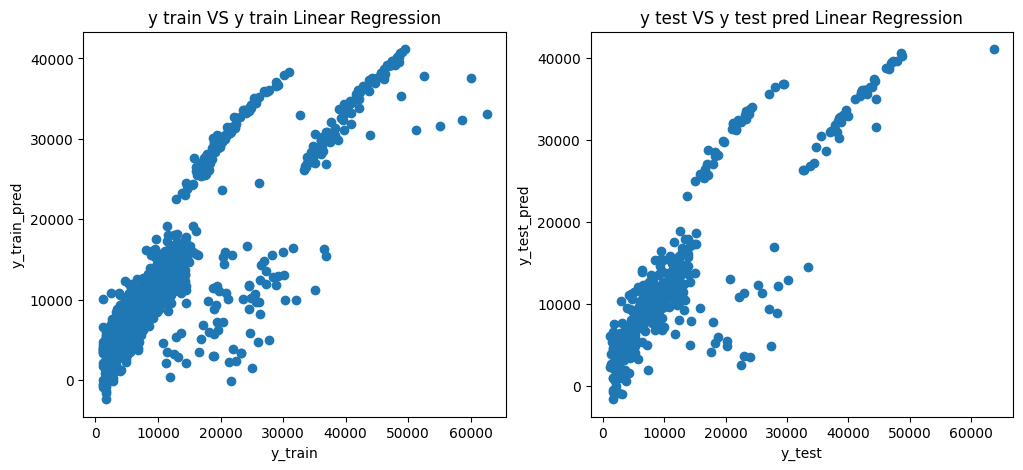

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.title("y train VS y train Linear Regression")
plt.ylabel("y_train_pred")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.title("y test VS y test pred Linear Regression")
plt.ylabel("y_test_pred")
plt.xlabel("y_test")

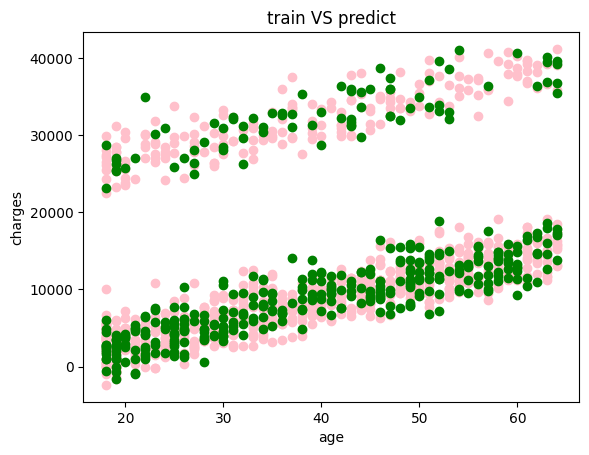

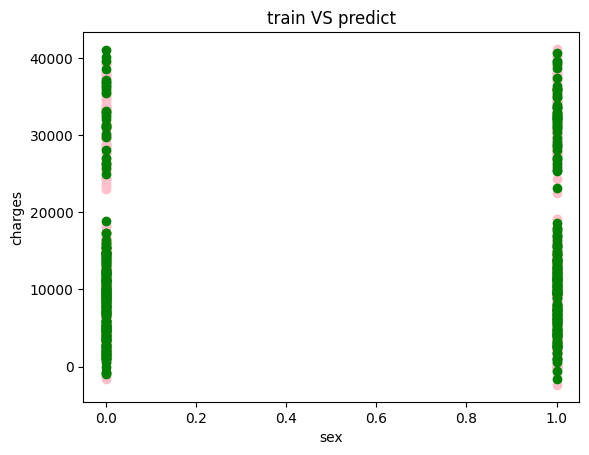

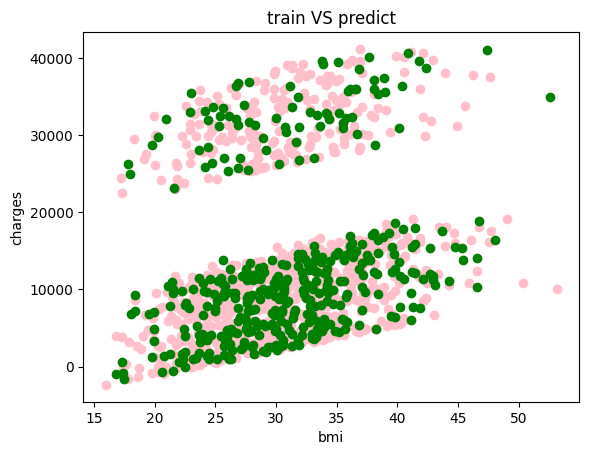

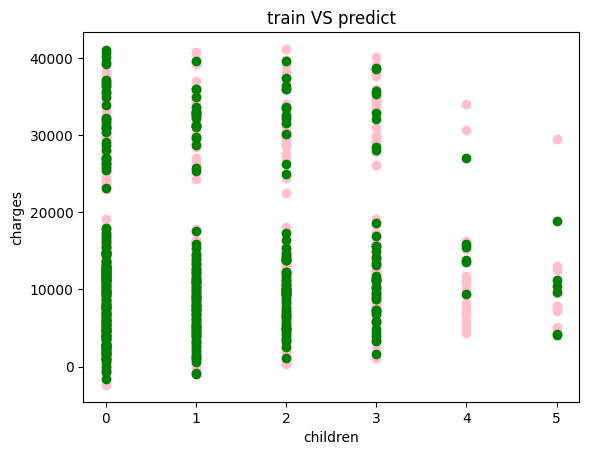

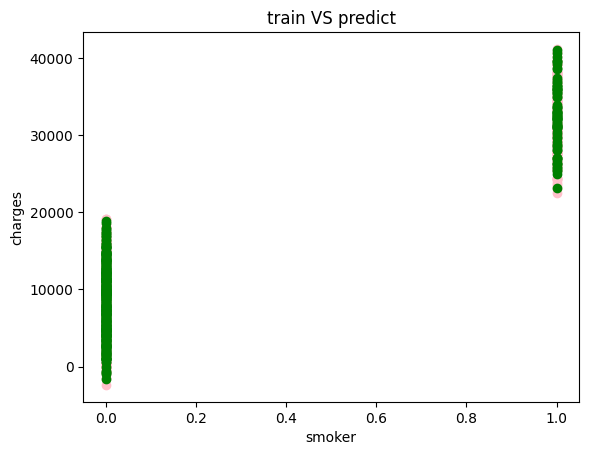

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred, color="pink")
    plt.scatter(X_test[i], y_test_pred, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Dari hasil evaluasi model dapat dikatakan bahwa model ini tidak overfit karena R-squared data train dan data test tidak terlalu berbeda jauh. Namun untuk kasus insurance ini masih tergolong rendah pada R-squared karena R2 score linear regression data train adalah 0.74225713201721 dan R2 score linear regression data test 0.7694415927057693

####Polynomial Regression<br>
Regresi polinomial adalah variasi dari regresi linear yang digunakan ketika hubungan antara variabel independen (X) dan variabel dependen (Y) tidak dapat dimodelkan secara linear. Polynomial yang digunakan berderajat 2

In [ ]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(x_quad, y, test_size=0.3, random_state=42)



In [ ]:
zscaler = StandardScaler()

X_train_standard_poly = zscaler.fit_transform(X_train_poly)
X_test_standard_poly = zscaler.transform(X_test_poly)

plr = LinearRegression().fit(X_train_standard_poly,y_train_poly)

y_train_pred_poly = plr.predict(X_train_standard_poly)
y_test_pred_poly = plr.predict(X_test_standard_poly)


print("Evaluasi Data Train")
print("R2 score Polynomial regression data train:")
print(r2_score(y_train_poly, y_train_pred_poly))
print("\nMSE Polynomial regression data train:")
print(mean_squared_error(y_train_poly, y_train_pred_poly))
print("\nMAE Polynomial regression data train:")
print(mean_absolute_error(y_train_poly, y_train_pred_poly))
print("\nRMSE Polynomial regression data train:")
print(np.sqrt(mean_squared_error(y_train_poly, y_train_pred_poly)))


print("\n\nEvaluasi Data Test")
print("R2 score Polynomial regression data test:")
print(r2_score(y_test_poly, y_test_pred_poly))
print("\nMSE Polynomial regression data test:")
print(mean_squared_error(y_test_poly, y_test_pred_poly))
print("\nMAE Polynomial regression data test:")
print(mean_absolute_error(y_test_poly, y_test_pred_poly))
print("\nRMSE Polynomial regression data test:")
print(np.sqrt(mean_squared_error(y_test_poly, y_test_pred_poly)))


Evaluasi Data Train
R2 score Polynomial regression data train:
0.8354696615124041

MSE Polynomial regression data train:
24098494.327203516

MAE Polynomial regression data train:
3005.171384935405

RMSE Polynomial regression data train:
4909.021728125016


Evaluasi Data Test
R2 score Polynomial regression data test:
0.8620919019912989

MSE Polynomial regression data test:
20220679.423521098

MAE Polynomial regression data test:
2732.873565240695

RMSE Polynomial regression data test:
4496.740978032991


Text(0.5, 0, 'y_test')

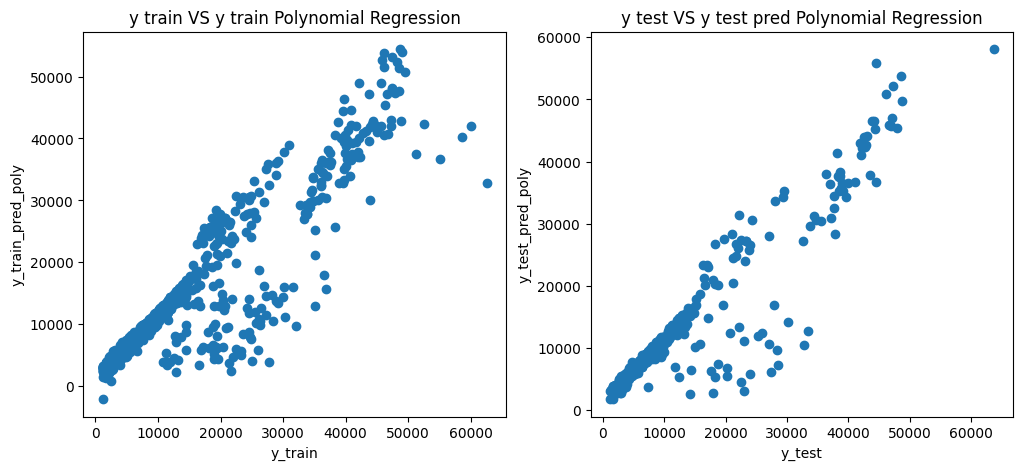

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_poly)
plt.title("y train VS y train Polynomial Regression")
plt.ylabel("y_train_pred_poly")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_poly)
plt.title("y test VS y test pred Polynomial Regression")
plt.ylabel("y_test_pred_poly")
plt.xlabel("y_test")

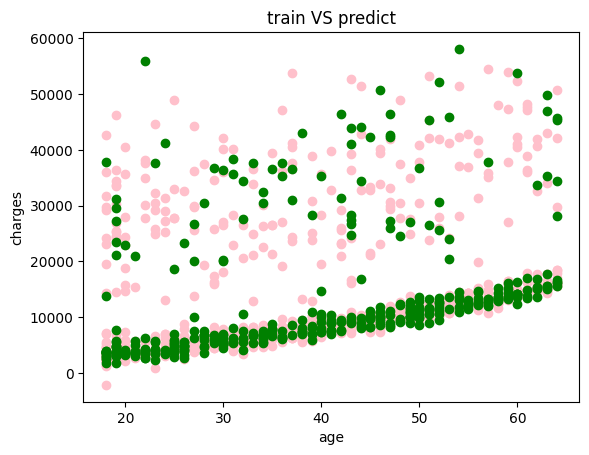

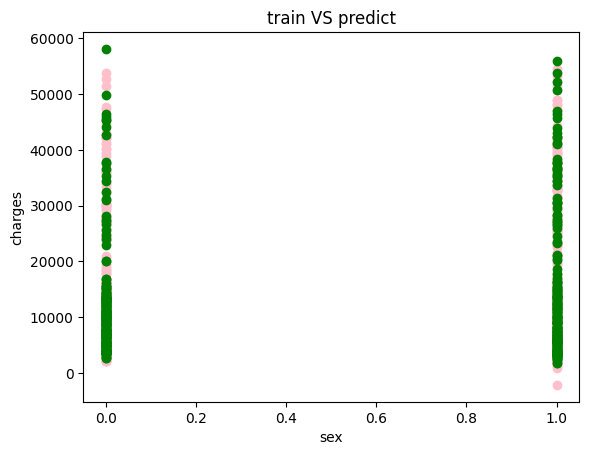

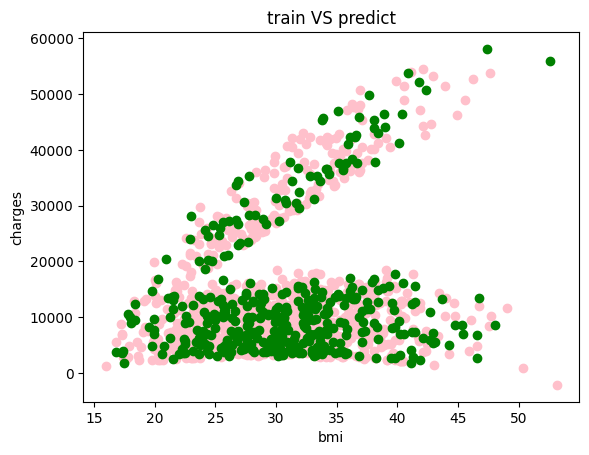

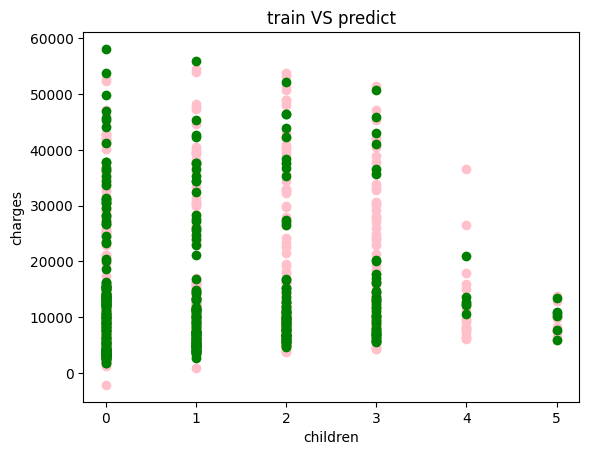

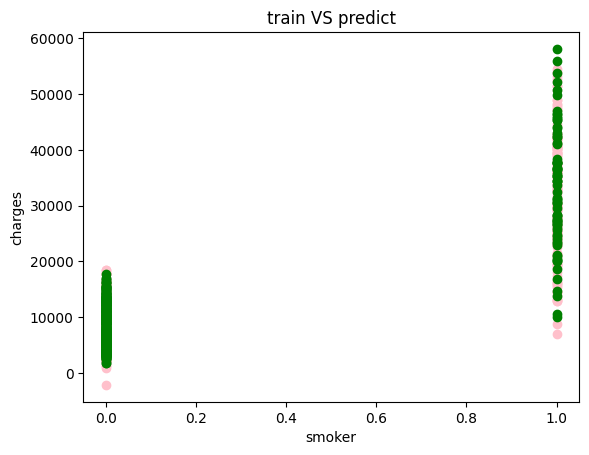

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_poly, color="pink")
    plt.scatter(X_test[i], y_test_pred_poly, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Dari hasil model polynomial regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. R2 score Polynomial regression data train 0.8384232211576609 dan R2 score Polynomial regression data test 0.8637557014627595

####Random Forest Regressor<br>
Random Forest Regressor adalah salah satu varian dari algoritma Random Forest, yang awalnya dibuat untuk masalah klasifikasi tetapi kemudian dimodifikasi untuk menangani masalah regresi. Random Forest Regressor adalah contoh pengajaran kelompok, yang berarti bahwa algoritma ini menggabungkan prediksi dari beberapa model yang lebih sederhana (biasanya pohon keputusan) untuk membuat prediksi.


Untuk kasus ini, menggunakan jumlah pohon keputusan sebesar 100. Kemudian menggunakan criterion (untuk mengukur kualitas pemisahan pada setiap node pohon keputusan) mengacu pada MSE. Dan menggunakan random state 42 serta menggunakan semua core (prosesor) yang tersedia pada komputer Anda untuk melatih model secara paralel (value dari n_jobs = -1)

In [ ]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', random_state = 42, n_jobs = -1)

f=forest.fit(X_train_standard,y_train)

y_train_pred_forest = f.predict(X_train_standard)
y_test_pred_forest = f.predict(X_test_standard)


print("Evaluasi Data Train")
print("R2 score Random Forest regression data train:")
print(r2_score(y_train, y_train_pred_forest))
print("\nMSE Random Forest regression data train:")
print(mean_squared_error(y_train, y_train_pred_forest))
print("\nMAE Random Forest regression data train:")
print(mean_absolute_error(y_train, y_train_pred_forest))
print("\nRMSE Random Forest regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_forest)))


print("\n\nEvaluasi Data Test")
print("R2 score Random Forest regression data test:")
print(r2_score(y_test, y_test_pred_forest))
print("\nMSE Random Forest regression data test:")
print(mean_squared_error(y_test, y_test_pred_forest))
print("\nMAE Random Forest regression data test:")
print(mean_absolute_error(y_test, y_test_pred_forest))
print("\nRMSE Random Forest regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_forest)))


Evaluasi Data Train
R2 score Random Forest regression data train:
0.9754013759663239

MSE Random Forest regression data train:
3602920.9395764098

MAE Random Forest regression data train:
1066.3185775808759

RMSE Random Forest regression data train:
1898.136175193026


Evaluasi Data Test
R2 score Random Forest regression data test:
0.8488561222441304

MSE Random Forest regression data test:
22161366.46838878

MAE Random Forest regression data test:
2551.027974476618

RMSE Random Forest regression data test:
4707.58605533545


Text(0.5, 0, 'y_test')

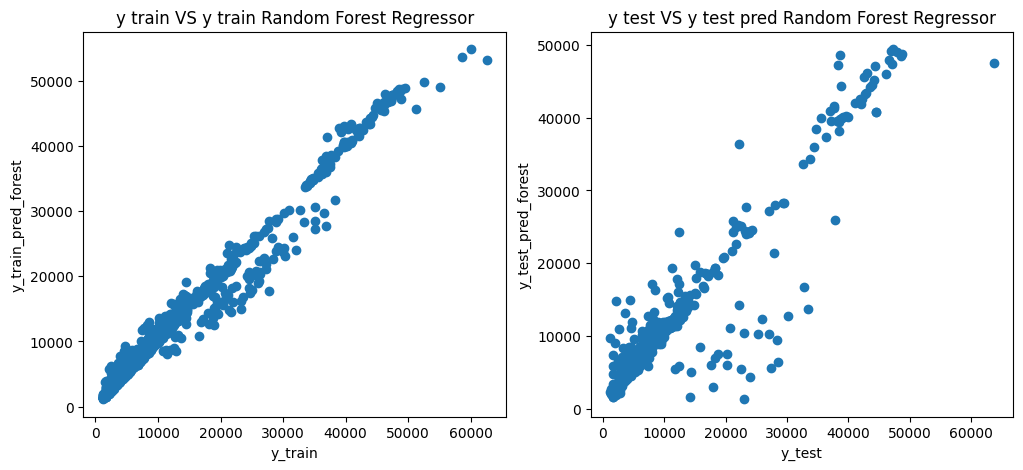

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_forest)
plt.title("y train VS y train Random Forest Regressor")
plt.ylabel("y_train_pred_forest")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_forest)
plt.title("y test VS y test pred Random Forest Regressor")
plt.ylabel("y_test_pred_forest")
plt.xlabel("y_test")

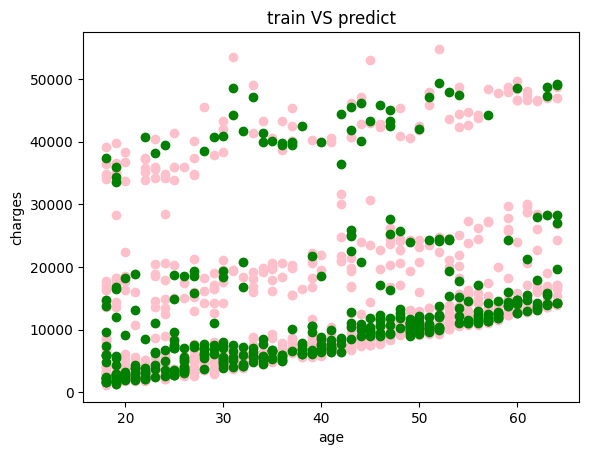

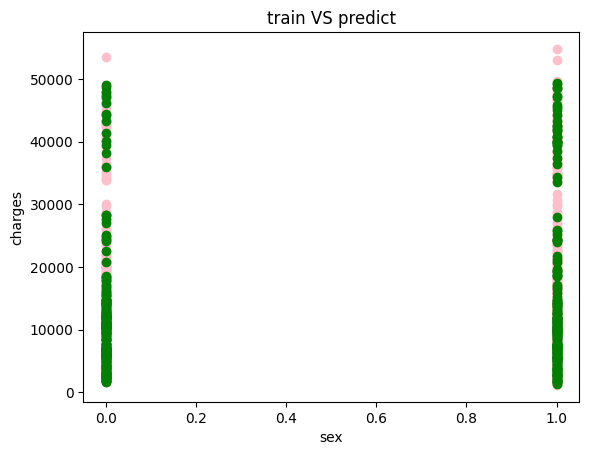

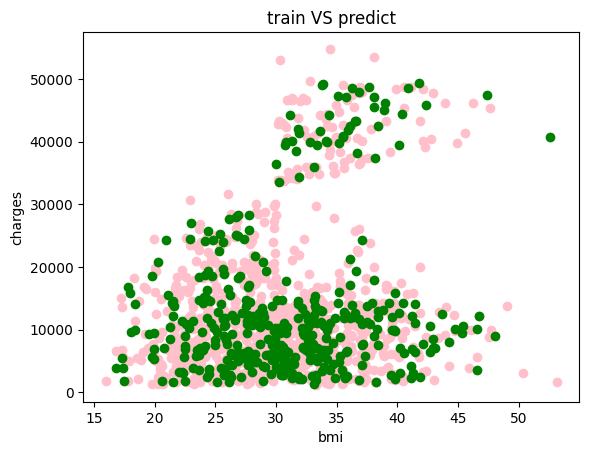

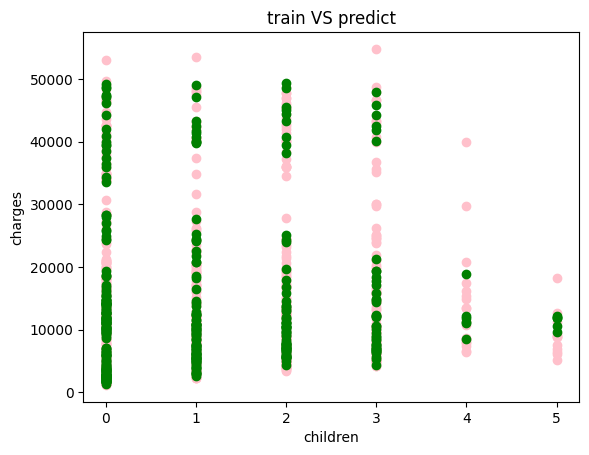

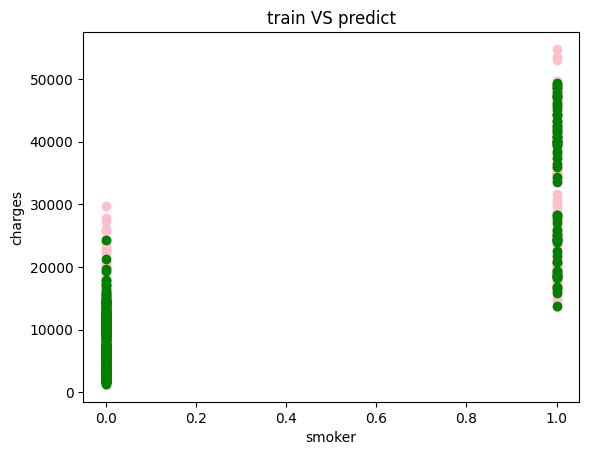

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_forest, color="pink")
    plt.scatter(X_test[i], y_test_pred_forest, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Random Forest Regressor ini memungkinkan model yang overfit untuk kasus ini. Hal ini terlihat dari R-squared pada data train 0.97 dengan data test 0.85 (berbeda jauh)

#### Ridge Regression <br>
Untuk mengatasi masalah overfitting dan multikolinieritas dalam model regresi linier, regresi ridge adalah variasi dari regresi linier yang menambahkan komponen regularisasi L2 (juga disebut sebagai "penalitas L2") ke dalam fungsi tujuan yang digunakan untuk melatih model.<br>

Metrik yang digunakan adalah negatif dari Mean Absolute Error (MAE), yang berarti model akan mencoba untuk meminimalkan MAE selama proses validasi silang.

In [ ]:
alpha = 10**np.linspace(10,-2,100)*0.5
ridge = RidgeCV(alphas=alpha, cv=10, scoring='neg_mean_absolute_error')

ridge.fit(X_train_standard,y_train)

y_train_pred_ridge = ridge.predict(X_train_standard)
y_test_pred_ridge = ridge.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Ridge regression data train:")
print(r2_score(y_train, y_train_pred_ridge))
print("\nMSE Ridge regression data train:")
print(mean_squared_error(y_train, y_train_pred_ridge))
print("\nMAE Ridge regression data train:")
print(mean_absolute_error(y_train, y_train_pred_ridge))
print("\nRMSE Ridge regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))


print("\n\nEvaluasi Data Test")
print("R2 score Ridge regression data test:")
print(r2_score(y_test, y_test_pred_ridge))
print("\nMSE Ridge regression data test:")
print(mean_squared_error(y_test, y_test_pred_ridge))
print("\nMAE Ridge regression data test:")
print(mean_absolute_error(y_test, y_test_pred_ridge))
print("\nRMSE Ridge regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))


Evaluasi Data Train
R2 score Ridge regression data train:
0.7413880154871687

MSE Ridge regression data train:
37878481.859436266

MAE Ridge regression data train:
4253.815620343128

RMSE Ridge regression data train:
6154.549687786773


Evaluasi Data Test
R2 score Ridge regression data test:
0.7680880690927636

MSE Ridge regression data test:
34003926.361663915

MAE Ridge regression data test:
4171.0207187317355

RMSE Ridge regression data test:
5831.288567860787


Text(0.5, 0, 'y_test')

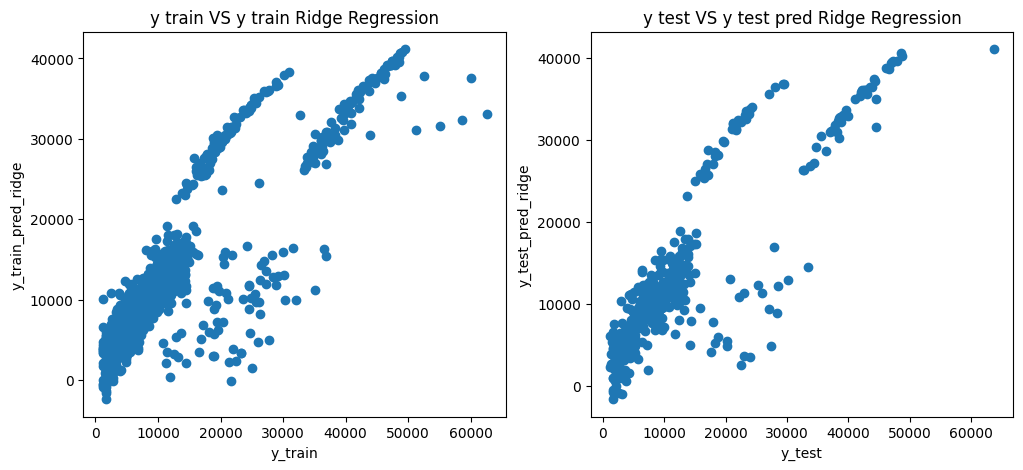

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ridge)
plt.title("y train VS y train Ridge Regression")
plt.ylabel("y_train_pred_ridge")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge)
plt.title("y test VS y test pred Ridge Regression")
plt.ylabel("y_test_pred_ridge")
plt.xlabel("y_test")

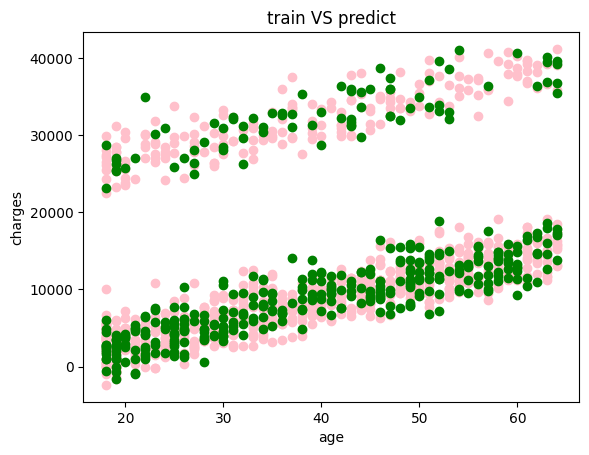

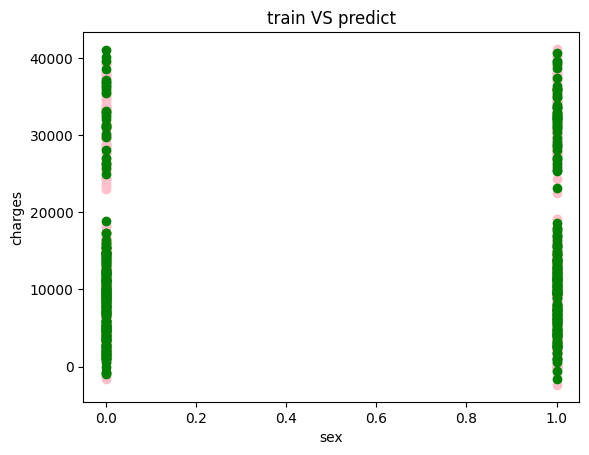

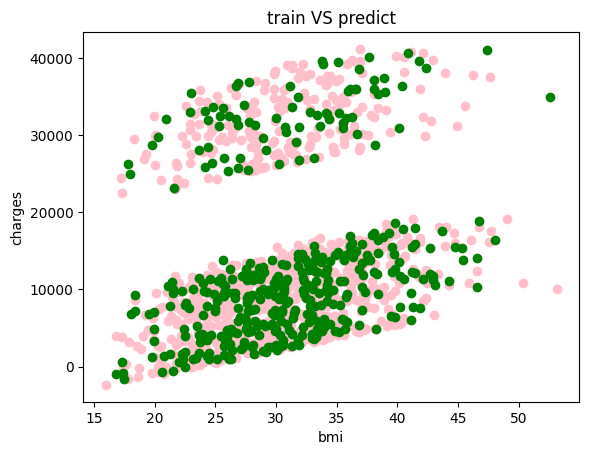

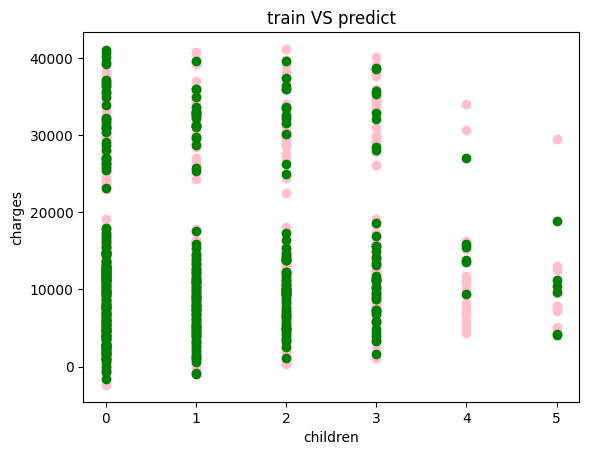

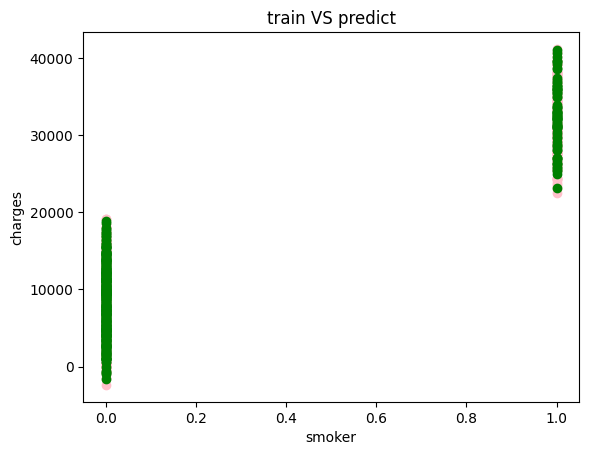

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_ridge, color="pink")
    plt.scatter(X_test[i], y_test_pred_ridge, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Dari hasil model Ridge Regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. R-squared data train 0.74 dan R-squared data test 0.76

####Lasso Regression <br>
Seperti Ridge Regression, Lasso Regression juga digunakan untuk mengatasi masalah overfitting dalam model regresi linier. Namun, Lasso Regression menggunakan metode regularisasi L1 (penalitas L1) sebagai komponen utama fungsi tujuan yang digunakan untuk melatih model regresi linier.
<br><br>
Untuk kasus ini menggunakan mencoba 100 nilai alpha yang berbeda untuk menemukan yang optimal.Semakin besar nilai alpha, semakin banyak koefisien yang akan ditekan menjadi nol.
<br><br>
Selain itu juga membatasi jumlah maksimum melakukan iterasi adalah 1000 iterasi

In [ ]:
lasso = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso.fit(X_train_standard, y_train)

y_train_pred_lasso = lasso.predict(X_train_standard)
y_test_pred_lasso = lasso.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Lasso regression data train:")
print(r2_score(y_train, y_train_pred_lasso))
print("\nMSE Lasso regression data train:")
print(mean_squared_error(y_train, y_train_pred_lasso))
print("\nMAE Lasso regression data train:")
print(mean_absolute_error(y_train, y_train_pred_lasso))
print("\nRMSE Lasso regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))


print("\n\nEvaluasi Data Test")
print("R2 score Lasso regression data test:")
print(r2_score(y_test, y_test_pred_lasso))
print("\nMSE Lasso regression data test:")
print(mean_squared_error(y_test, y_test_pred_lasso))
print("\nMAE Lasso regression data test:")
print(mean_absolute_error(y_test, y_test_pred_lasso))
print("\nRMSE Lasso regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))



Evaluasi Data Train
R2 score Lasso regression data train:
0.7412063077143412

MSE Lasso regression data train:
37905096.30497223

MAE Lasso regression data train:
4250.825349357335

RMSE Lasso regression data train:
6156.71148462978


Evaluasi Data Test
R2 score Lasso regression data test:
0.7683358134454069

MSE Lasso regression data test:
33967601.01742293

MAE Lasso regression data test:
4161.822834203263

RMSE Lasso regression data test:
5828.173042851673


Text(0.5, 0, 'y_test')

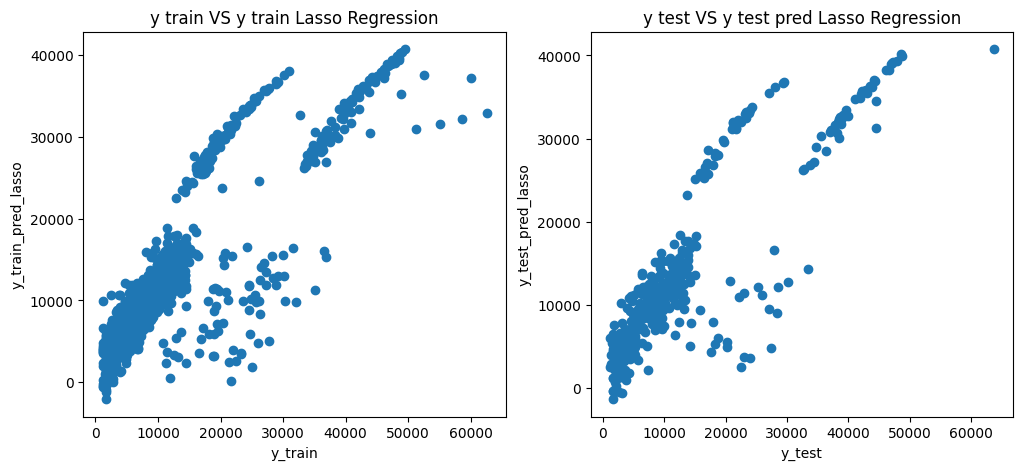

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_lasso)
plt.title("y train VS y train Lasso Regression")
plt.ylabel("y_train_pred_lasso")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lasso)
plt.title("y test VS y test pred Lasso Regression")
plt.ylabel("y_test_pred_lasso")
plt.xlabel("y_test")

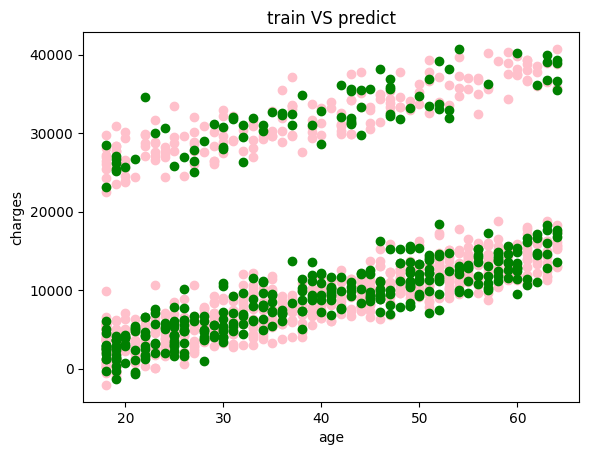

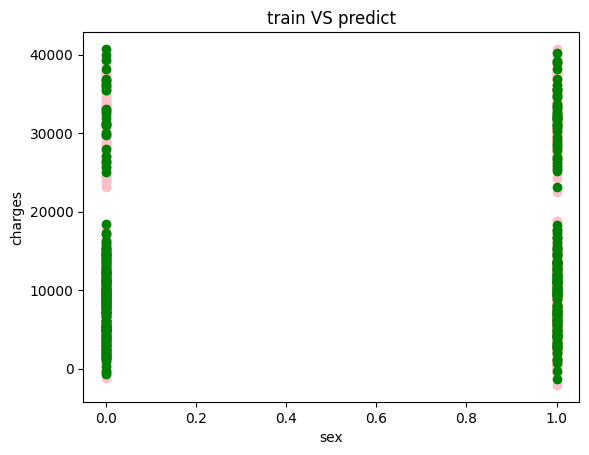

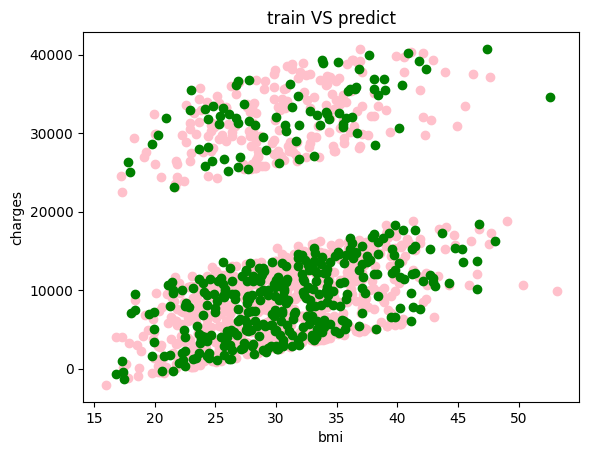

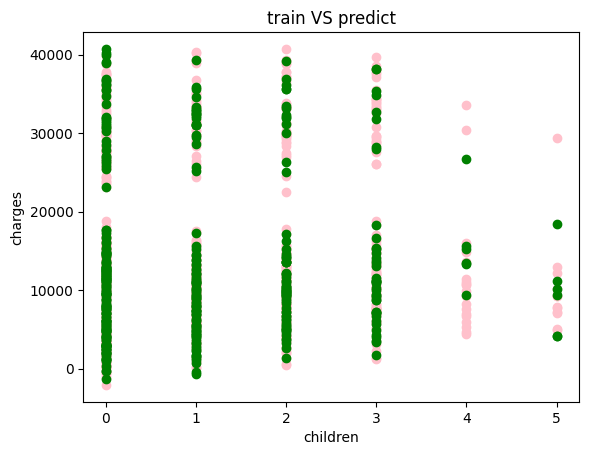

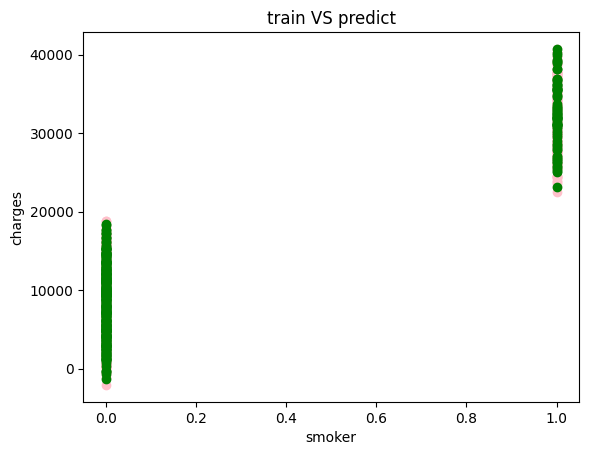

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_lasso, color="pink")
    plt.scatter(X_test[i], y_test_pred_lasso, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Dari hasil model Lasso Regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test.

####Elastic Net<br>

Elastic Net Regression menggabungkan elemen dari Ridge Regression (L2 Regularization) dan Lasso Regression (L1 Regularization). Tujuannya adalah untuk melakukan seleksi fitur otomatis dan menyelesaikan masalah overfitting dan multikolinieritas dalam model regresi.


In [ ]:
elasticnet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.01, n_alphas=100, max_iter=1000)
elasticnet.fit(X_train_standard, y_train)

y_train_pred_elasticnet = elasticnet.predict(X_train_standard)
y_test_pred_elasticnet = elasticnet.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Elastic Net regression data train:")
print(r2_score(y_train, y_train_pred_elasticnet))
print("\nMSE Elastic Net regression data train:")
print(mean_squared_error(y_train, y_train_pred_elasticnet))
print("\nMAE Elastic Net regression data train:")
print(mean_absolute_error(y_train, y_train_pred_elasticnet))
print("\nRMSE Elastic Net regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_elasticnet)))


print("\n\nEvaluasi Data Test")
print("R2 score Elastic Net regression data test:")
print(r2_score(y_test, y_test_pred_elasticnet))
print("\nMSE Elastic Net regression data test:")
print(mean_squared_error(y_test, y_test_pred_elasticnet))
print("\nMAE Elastic Net regression data test:")
print(mean_absolute_error(y_test, y_test_pred_elasticnet))
print("\nRMSE Elastic Net regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_elasticnet)))


Evaluasi Data Train
R2 score Elastic Net regression data train:
0.7411283524077144

MSE Elastic Net regression data train:
37916514.293482974

MAE Elastic Net regression data train:
4250.449543870268

RMSE Elastic Net regression data train:
6157.63869462012


Evaluasi Data Test
R2 score Elastic Net regression data test:
0.7682620533411908

MSE Elastic Net regression data test:
33978416.04165381

MAE Elastic Net regression data test:
4160.731611160003

RMSE Elastic Net regression data test:
5829.100791859222


Text(0.5, 0, 'y_test')

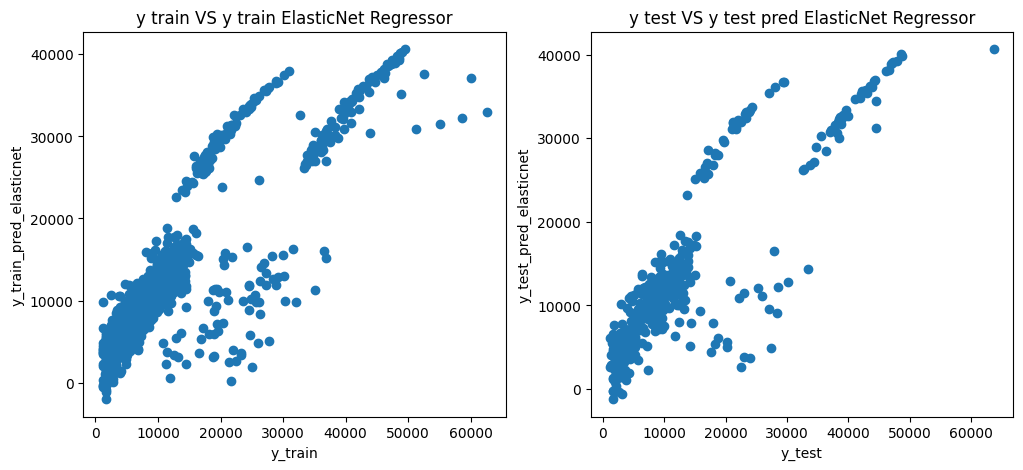

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_elasticnet)
plt.title("y train VS y train ElasticNet Regressor")
plt.ylabel("y_train_pred_elasticnet")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_elasticnet)
plt.title("y test VS y test pred ElasticNet Regressor")
plt.ylabel("y_test_pred_elasticnet")
plt.xlabel("y_test")

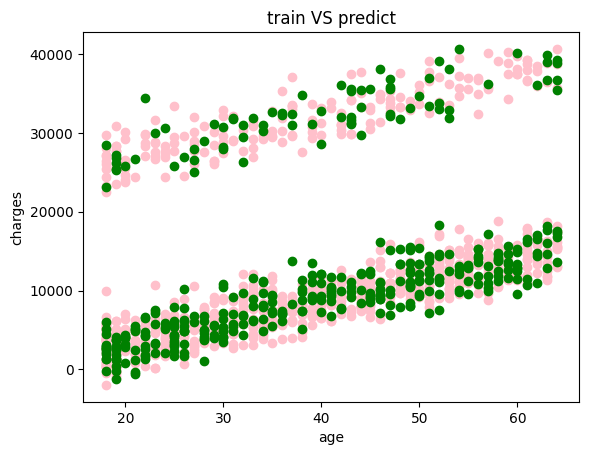

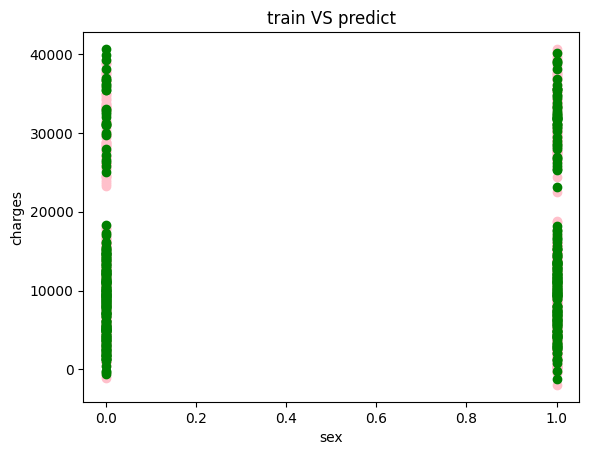

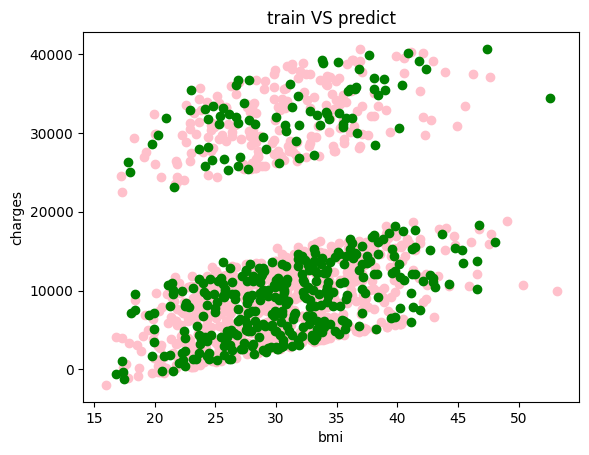

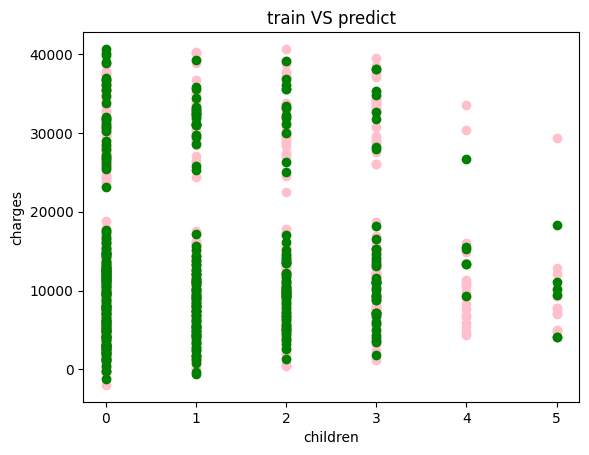

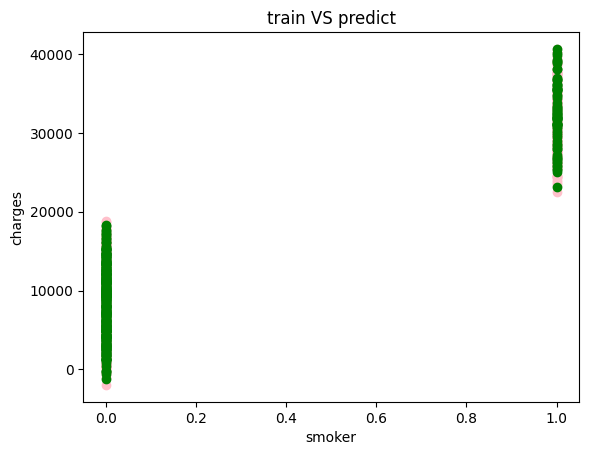

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_elasticnet, color="pink")
    plt.scatter(X_test[i], y_test_pred_elasticnet, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Dari hasil model ElasticNet Regression ini tidak overfit karena tidak berbeda jauh nilai R-squared antara data train dan data test. dengan R-squared data train 0.74 dan data test 0.76

####Decision Tree Regressor<br>

Untuk melakukan tugas regresi, algoritma Decision Tree Regressor memodelkan hubungan antara variabel independen (prediktor) dan variabel dependen (target) dalam bentuk pohon keputusan. Ini adalah versi algoritma Decision Tree yang umum digunakan untuk tugas klasifikasi.


In [ ]:
dts = DecisionTreeRegressor()
dts.fit(X_train_standard, y_train)

y_train_pred_dts = dts.predict(X_train_standard)
y_test_pred_dts = dts.predict(X_test_standard)

print("Evaluasi Data Train")
print("R2 score Decision Tree regression data train:")
print(r2_score(y_train, y_train_pred_dts))
print("\nMSE Decision Tree regression data train:")
print(mean_squared_error(y_train, y_train_pred_dts))
print("\nMAE Decision Tree regression data train:")
print(mean_absolute_error(y_train, y_train_pred_dts))
print("\nRMSE Decision Tree regression data train:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred_dts)))


print("\n\nEvaluasi Data Test")
print("R2 score Decision Tree regression data test:")
print(r2_score(y_test, y_test_pred_dts))
print("\nMSE Decision Tree regression data test:")
print(mean_squared_error(y_test, y_test_pred_dts))
print("\nMAE Decision Tree regression data test:")
print(mean_absolute_error(y_test, y_test_pred_dts))
print("\nRMSE Decision Tree regression data test:")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_dts)))


Evaluasi Data Train
R2 score Decision Tree regression data train:
1.0

MSE Decision Tree regression data train:
0.0

MAE Decision Tree regression data train:
0.0

RMSE Decision Tree regression data train:
0.0


Evaluasi Data Test
R2 score Decision Tree regression data test:
0.7479797837413454

MSE Decision Tree regression data test:
36952289.78425321

MAE Decision Tree regression data test:
2755.828485519901

RMSE Decision Tree regression data test:
6078.839509664094


Text(0.5, 0, 'y_test')

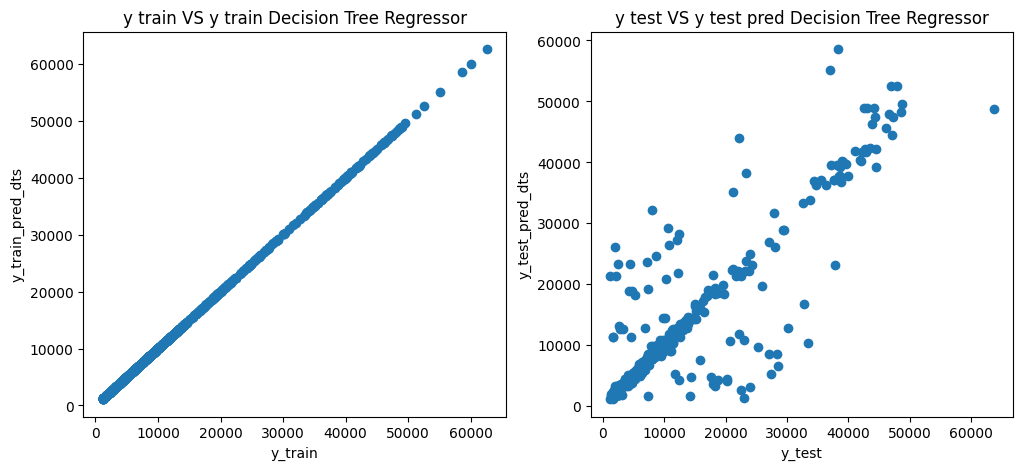

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_dts)
plt.title("y train VS y train Decision Tree Regressor")
plt.ylabel("y_train_pred_dts")
plt.xlabel("y_train")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_dts)
plt.title("y test VS y test pred Decision Tree Regressor")
plt.ylabel("y_test_pred_dts")
plt.xlabel("y_test")

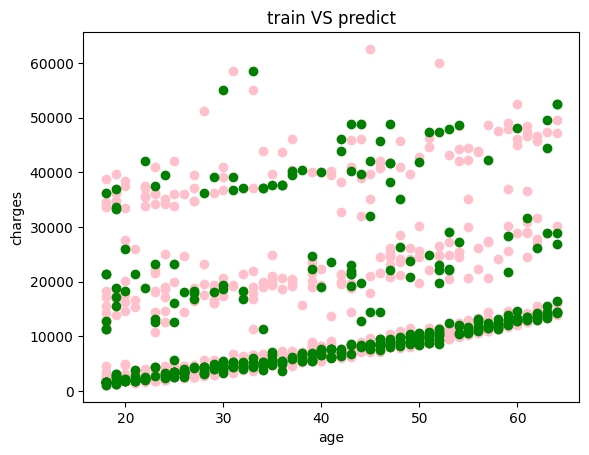

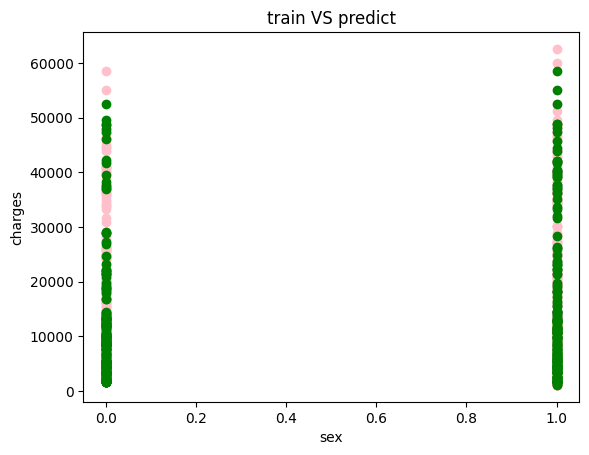

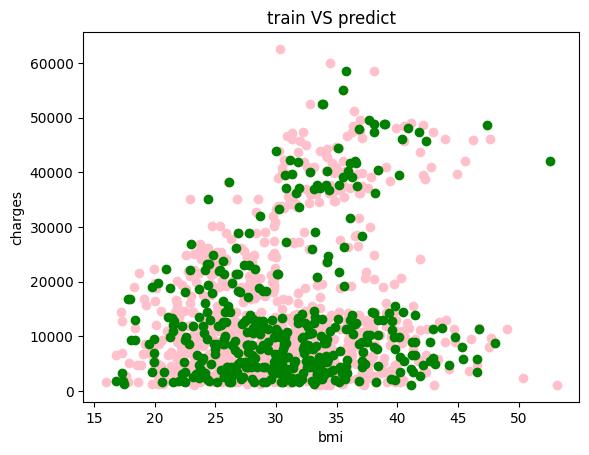

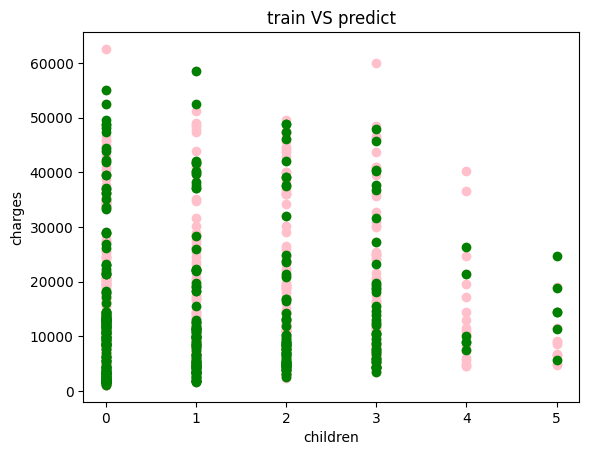

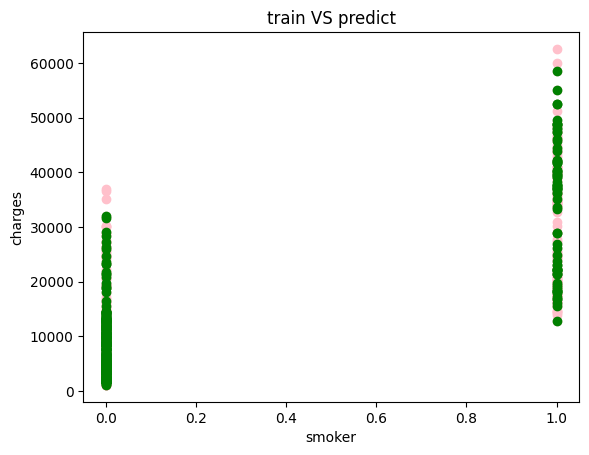

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train_pred_dts, color="pink")
    plt.scatter(X_test[i], y_test_pred_dts, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Dari hasil yang diperoleh, dapat dikatakan Decision Tree Regressor ini overfit karena memiliki nilai R-squared yang berbeda jauh antara data train dan data test. Sehingga tidak cocok untuk kasus insurance prediction

###Kesimpulan<br>
Berdasarkan hasil yang telah diperoleh dengan melakukan 7 model regresi, model regresi yang paling tepat untuk kasus prediksi harga rumah ini adalah Polynomial Regression dengan hasil R-squared data train 0.83 dengan data test 0.86. Selain itu karena R-squared dari data test lebih baik dari pada data train, maka model polynomial regression paling tepat digunakan dari 7 model regresi lainnya.